# Congo Democratic Republic Notebook

Mimics all steps done with Central African Republic example.

In [1]:
!pip install keras

In [2]:
# We import all modules that may be needed ahead.

import pandas as pd
import numpy as np
from itertools import product

#Scikit-learn
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

#Plotting libraries
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

# And a warning hider to make our code cleaner.
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

!pip install geopandas

In [3]:
df=pd.read_csv("countries/Congo Democratic Republic.csv")
df

,gid,year,month,ym,ged_state,ged_nonstate,ged_viol_tot,ged_viol_state,ged_viol_nonstate,ged_state_fatal_best,...,diamprim_s,goldplacer_s,goldsurface_s,mountains_mean,ttime_mean,year_y,droughtstart_speibase,goldvein_y,nearest_country_dist,own_borders_dist
0,110579,2004,1,2004-01-01,0,0,0,0,0,0,...,NaN,NaN,NaN,0.074722,777.7450,2012,0.200284,NaN,15.00925,15.00925
1,110579,2004,1,2004-01-01,0,0,0,0,0,0,...,NaN,NaN,NaN,0.074722,777.7450,2014,NaN,NaN,15.00925,15.00925
2,110579,2004,1,2004-01-01,0,0,0,0,0,0,...,NaN,NaN,NaN,0.074722,777.7450,2013,0.200284,NaN,15.00925,15.00925
3,110579,2004,1,2004-01-01,0,0,0,0,0,0,...,NaN,NaN,NaN,0.074722,777.7450,2006,0.200284,NaN,15.00925,15.00925
4,110579,2004,1,2004-01-01,0,0,0,0,0,0,...,NaN,NaN,NaN,0.074722,777.7450,2010,0.801303,NaN,15.00925,15.00925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109323,136495,2014,12,2014-12-01,0,0,0,0,0,0,...,1.0,NaN,1.0,0.000000,422.1247,2013,0.247571,NaN,36.80735,36.80735
1109324,136495,2014,12,2014-12-01,0,0,0,0,0,0,...,1.0,NaN,1.0,0.000000,422.1247,2009,-1.733822,NaN,36.80735,36.80735
1109325,136495,2014,12,2014-12-01,0,0,0,0,0,0,...,1.0,NaN,1.0,0.000000,422.1247,2007,1.746973,NaN,36.80735,36.80735
1109326,136495,2014,12,2014-12-01,0,0,0,0,0,0,...,1.0,NaN,1.0,0.000000,422.1247,2005,0.385123,NaN,36.80735,36.80735


In [4]:
#We remove variables that may cause target leakage + we set the target variable
def remove_columns_by_name(df, column_names):
    for column_name in column_names:
        if column_name in df.columns:
            df.drop(column_name, axis=1, inplace=True)
            
            
cols_to_remove =["ged_state_fatal_high", "ged_state_fatal_low", "ged_state_fatal_sidea", "ged_state_fatal_sideb",
         "ged_nonstate_fatal_high", "ged_nonstate_fatal_low", "ged_nonstate_fatal_sidea",
         "ged_nonstate_fatal_sideb", "ged_viol_fatal_tot_high", "ged_viol_fatal_tot_low",
         "ged_viol_fatal_state_best", "ged_viol_fatal_state_high", "ged_viol_fatal_state_low", "ged_viol_fatal_nonstate_best",
          "ged_viol_fatal_nonstate_high", "ged_viol_fatal_nonstate_low", "acled_battle_state", "acled_battle_rebel",
          "acled_battle_polmil", "acled_battle_idmil", "acled_remote_state", "acled_remote_rebel", 
          "acled_remote_polmil", "acled_remote_idmil", "acled_viol_state", "acled_viol_rebel",
          "acled_viol_polmil", "acled_viol_idmil", "acled_fatal_state", "acled_fatal_rebel", 
          "acled_fatal_polmil", "acled_fatal_idmil", "pitf_tot_deaths_inc", "pitf_tot_deaths_camp",
          "pitf_state_deaths_inc", "pitf_state_deaths_camp", "pitf_nonstate_sanc_deaths_inc",
          "pitf_nonstate_sanc_deaths_camp", "pitf_nonstate_deaths_inc", "pitf_nonstate_deaths_camp", 
         "pitf_multiple_deaths_inc","pitf_multiple_deaths_camp", "pitf_trans_deaths_inc", "COWCODE",
         "row", "col", "year_y", "country.name", "xcoord", "ycoord", "pitf_trans_deaths_camp", "gid"]

remove_columns_by_name(df, cols_to_remove)

# We remove "SCAD" columns
scad_cols = [col for col in df.columns if 'scad' in col]
df = df.drop(columns=scad_cols)

#We remove columns with more than 30% of missing values
missing_percentage = df.isna().mean() * 100
selected_columns = missing_percentage[missing_percentage <= 30].index
df= df[selected_columns].copy()

#We set now the target variable
df["target"]=df["ged_state_fatal_best"] + df["ged_nonstate_fatal_best"] + df["ged_viol_fatal_tot_best"]
df.drop(["ged_state_fatal_best", "ged_nonstate_fatal_best", "ged_viol_fatal_tot_best"], axis=1, inplace=True)

In [5]:
#We set up also the lagged variable, using "ym", and drop "ym" as we already have year and months columns.

df = df.sort_values('ym')
num_lags = 3
for i in range(1, num_lags+1):
    df['lag{}'.format(i)] = df['target'].shift(i)
    
df.drop("ym", axis=1, inplace=True)

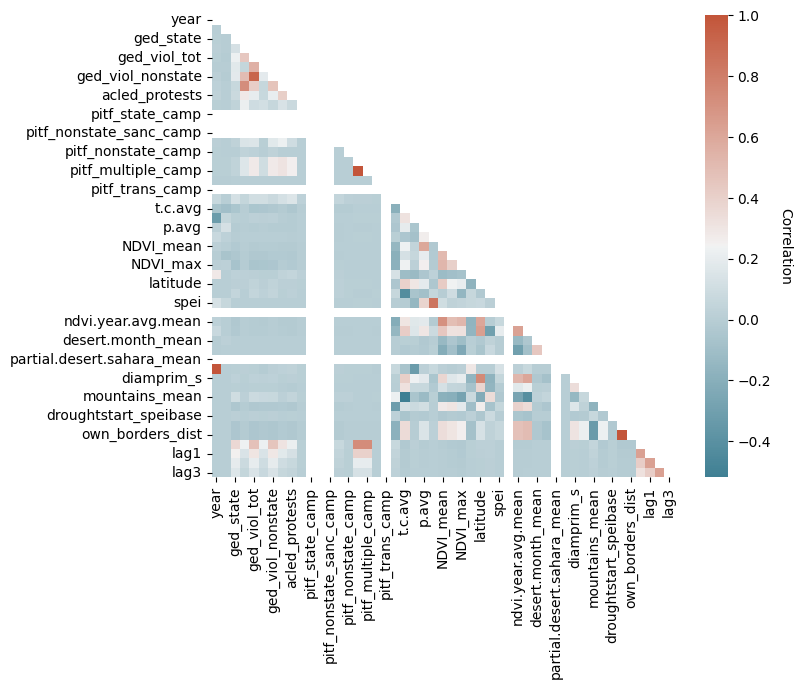

In [6]:
# Correlation matrix

# We calculate the threshold for missing values
threshold = len(df) * 0.3
df_filtered = df.dropna(thresh=threshold, axis=1)

# We fill remaining missing values with 0
df_filled = df_filtered.fillna(0)

# We one-hot encode categorical columns
df_encoded = pd.get_dummies(df_filled)

# And we create the correlation matrix
# And we create the correlation matrix
corr_matrix = df_encoded.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=False, square=True, cbar=True)
cbar = plt.gca().collections[0].colorbar
cbar.set_label('Correlation', rotation=270, labelpad=15)
plt.show()

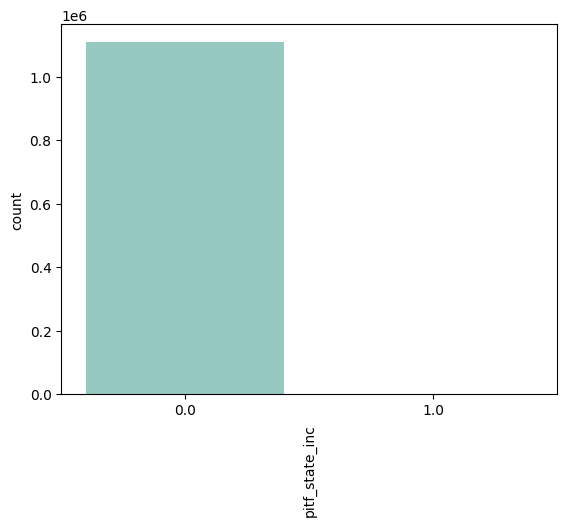

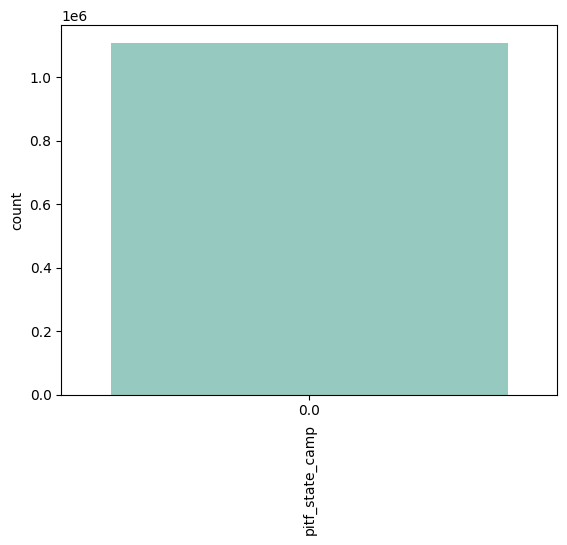

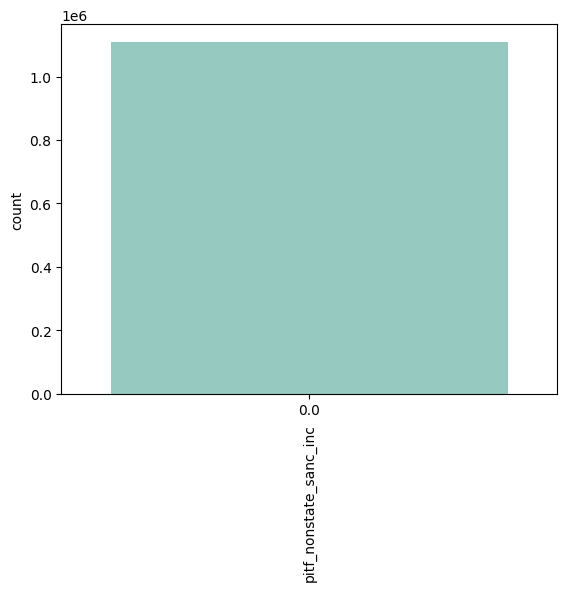

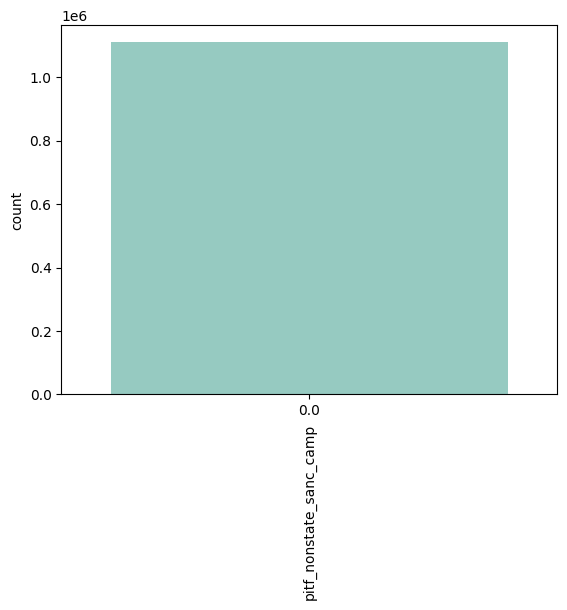

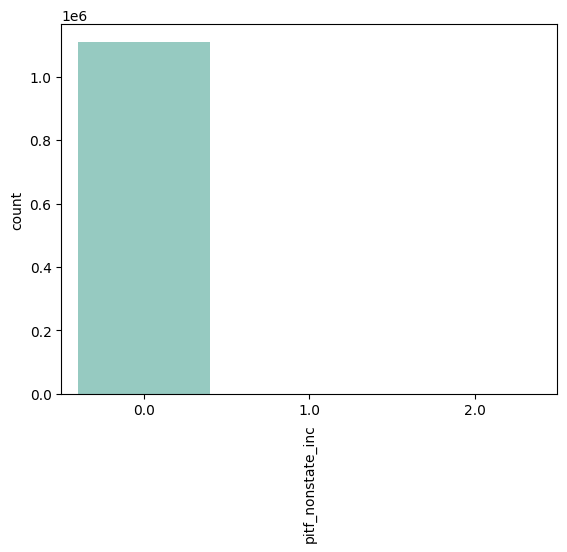

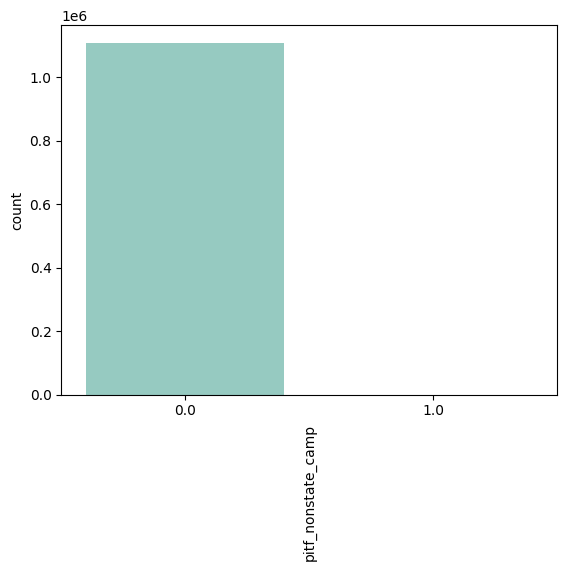

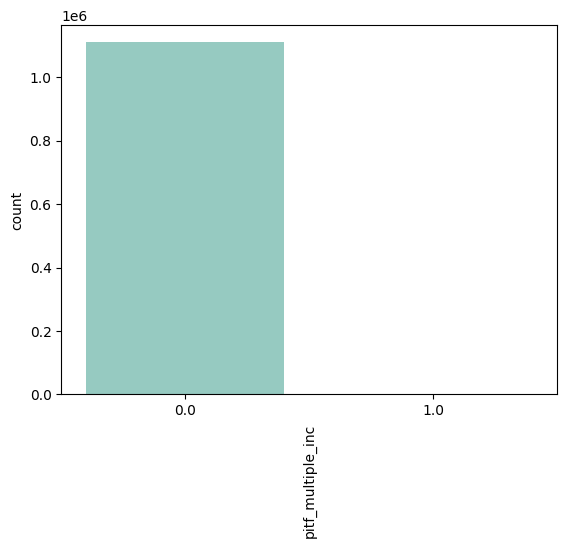

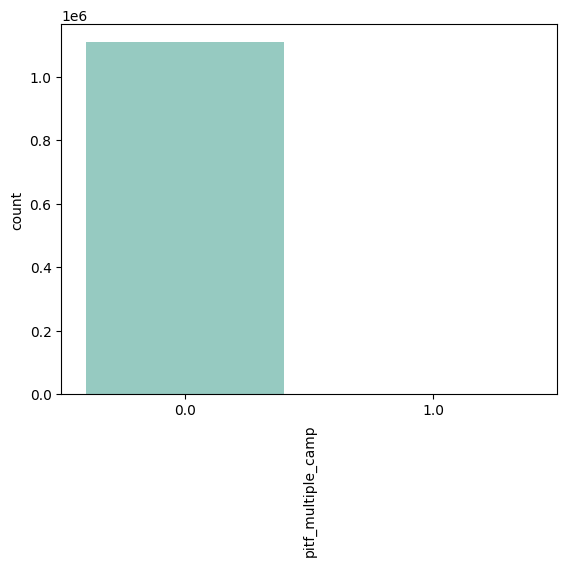

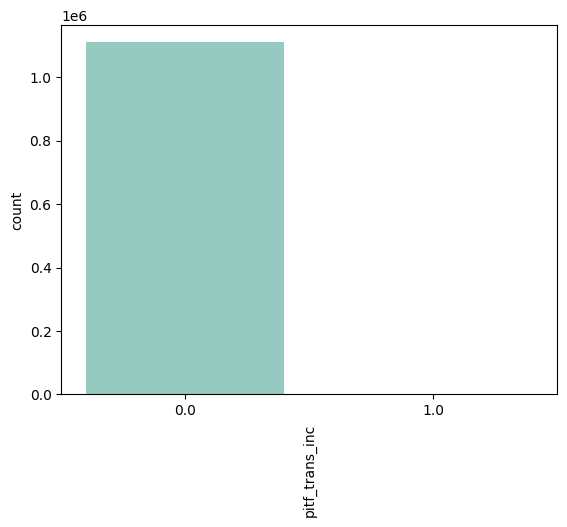

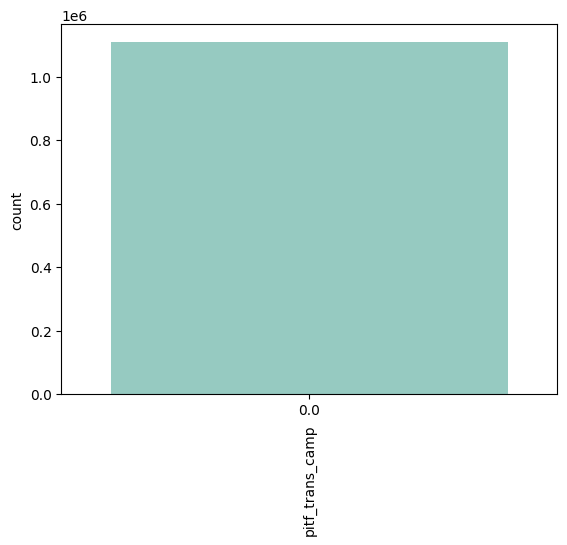

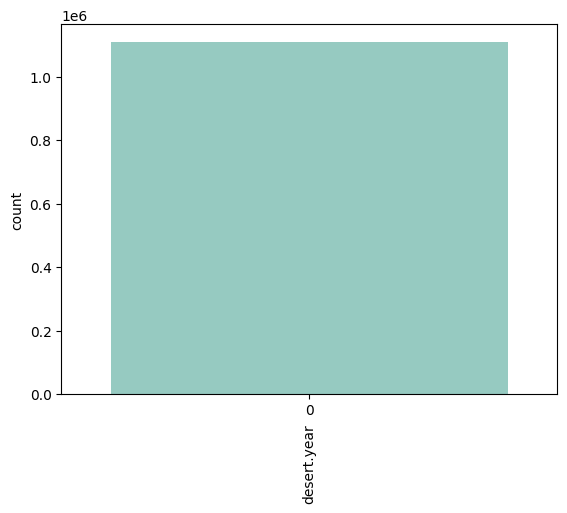

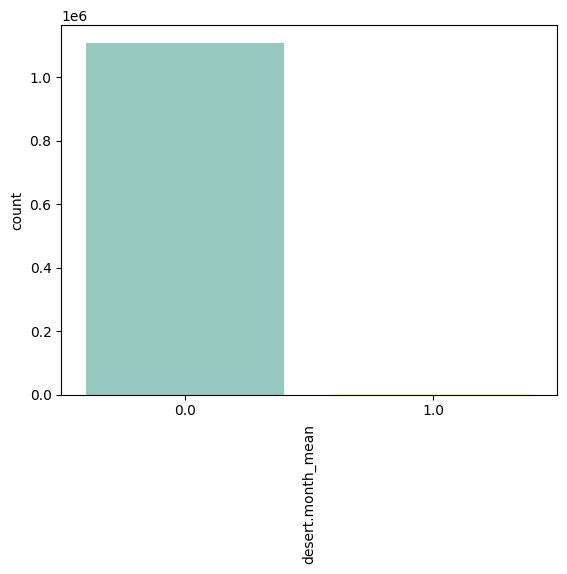

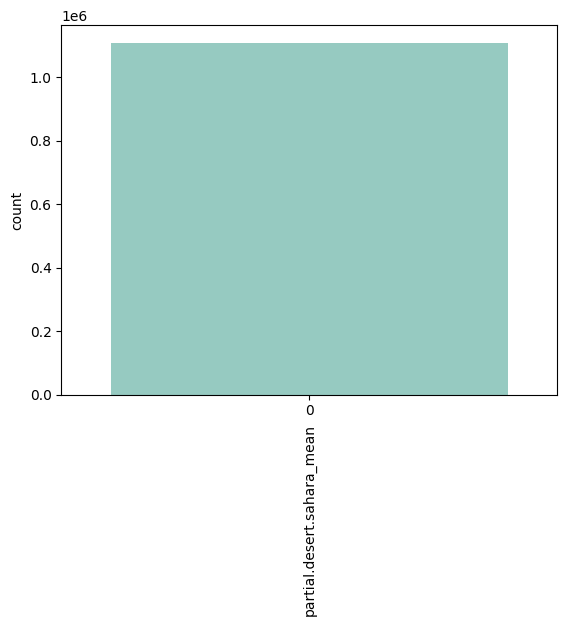

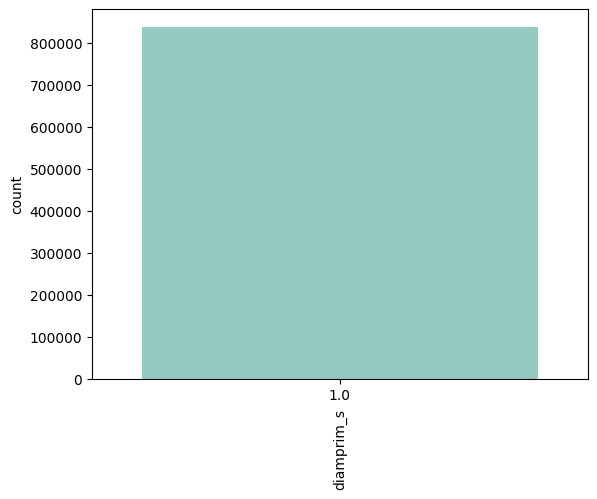

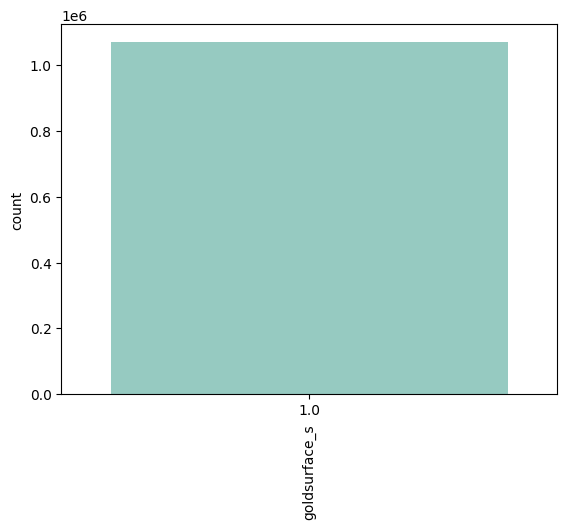

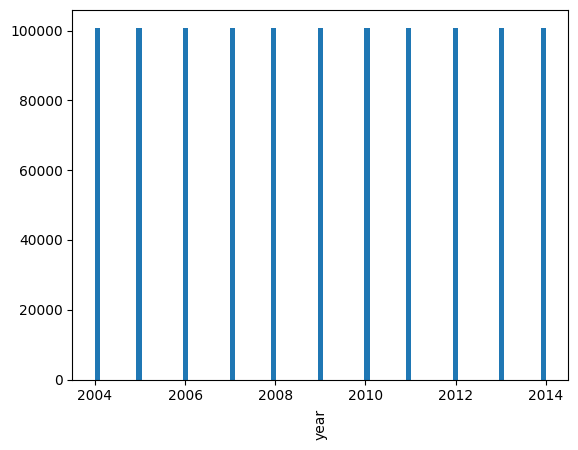

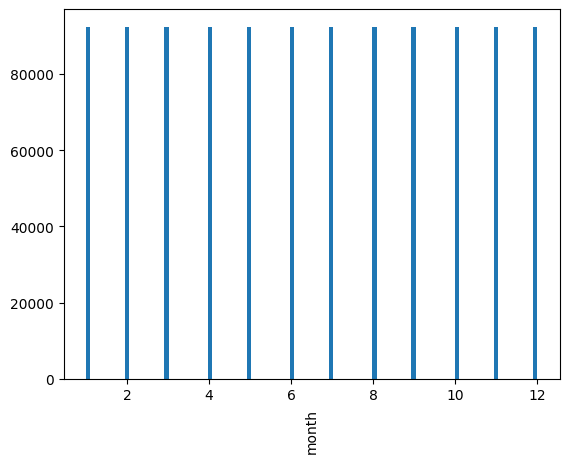

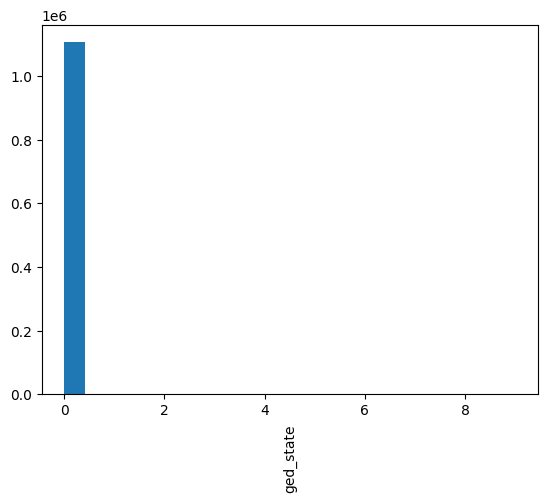

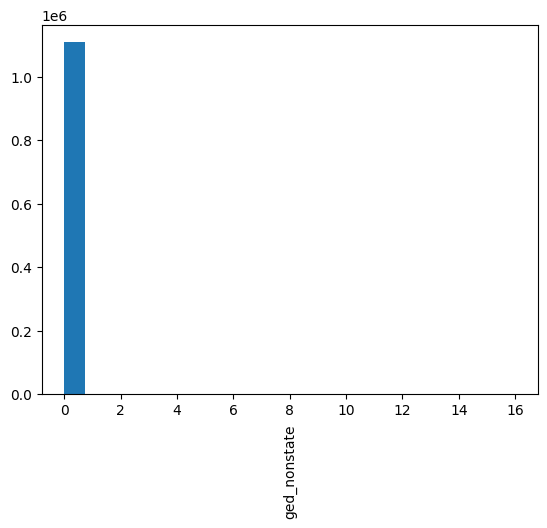

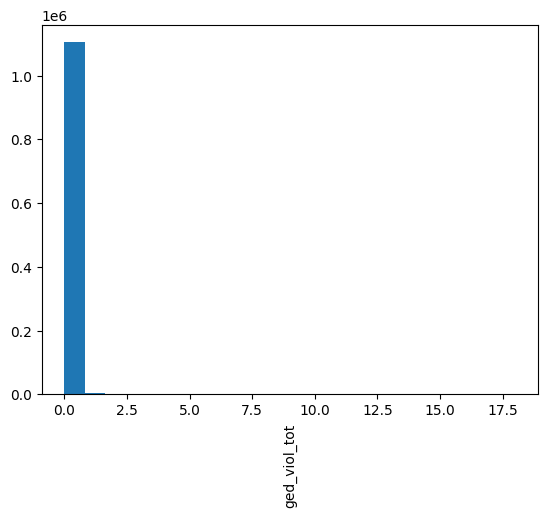

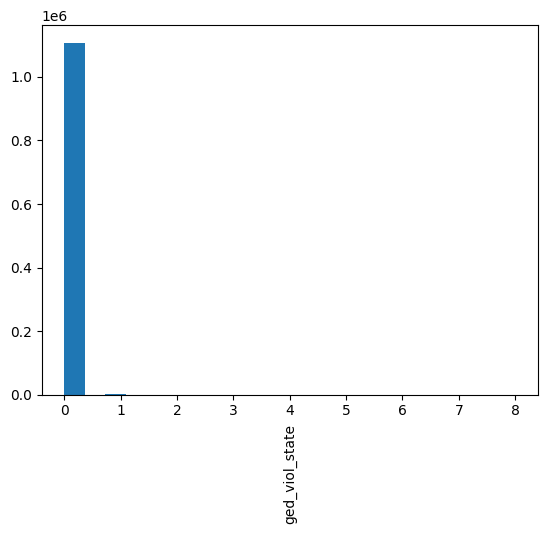

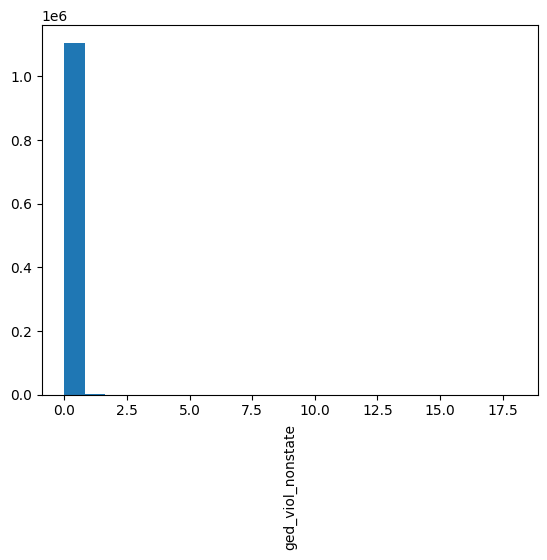

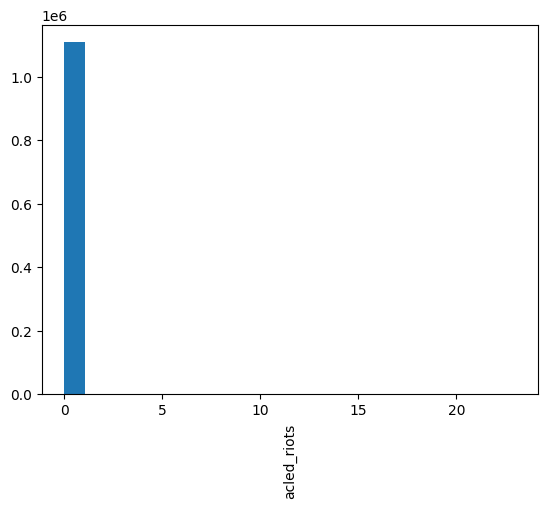

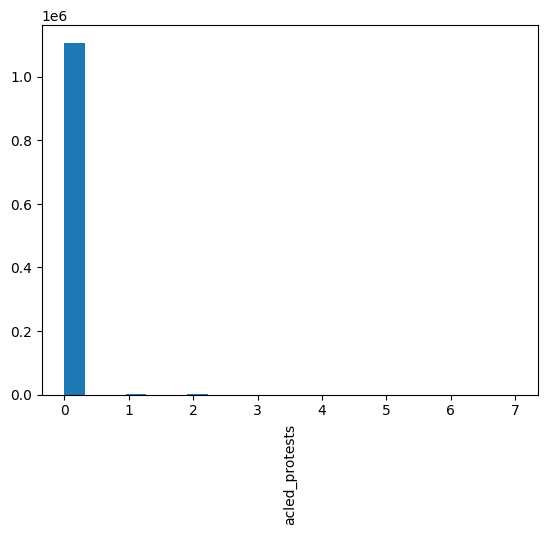

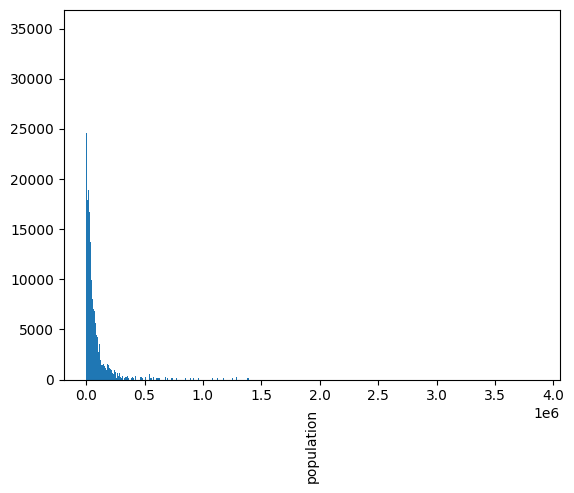

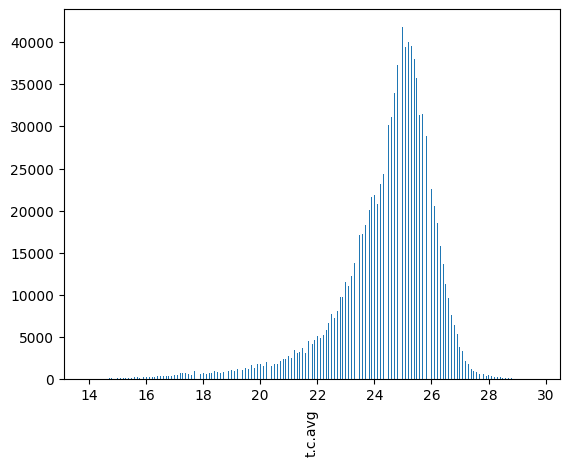

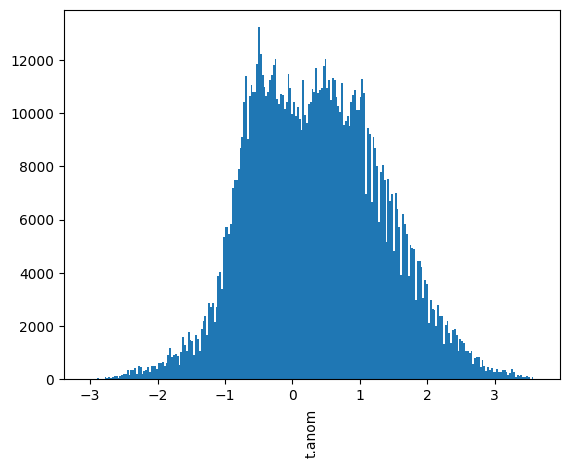

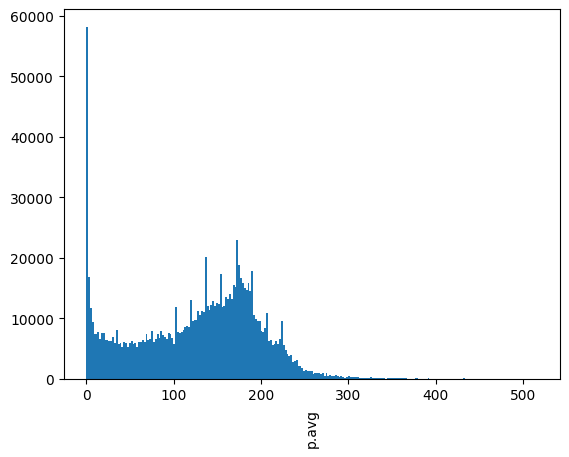

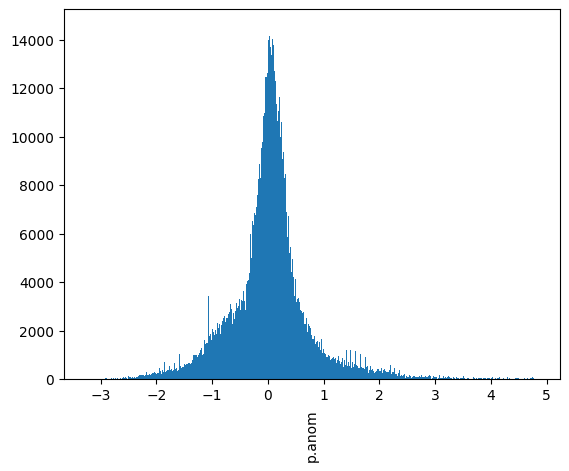

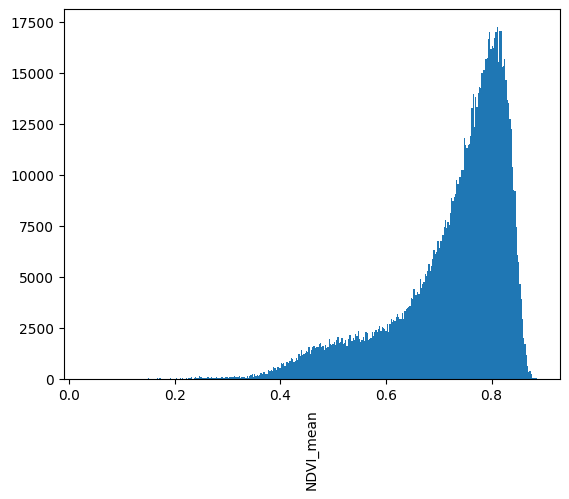

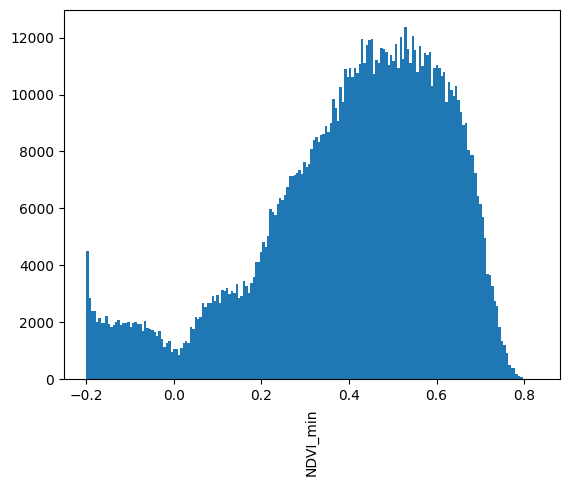

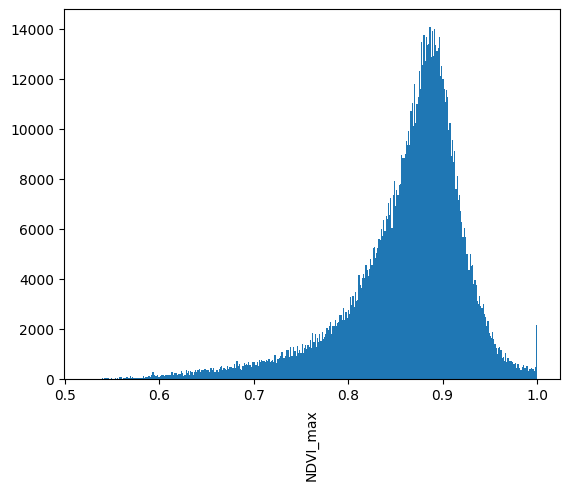

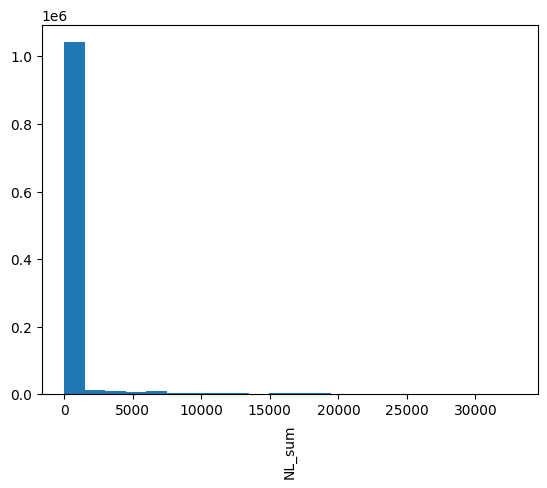

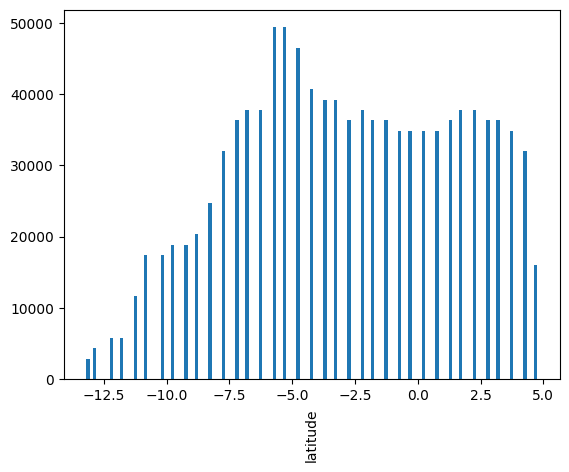

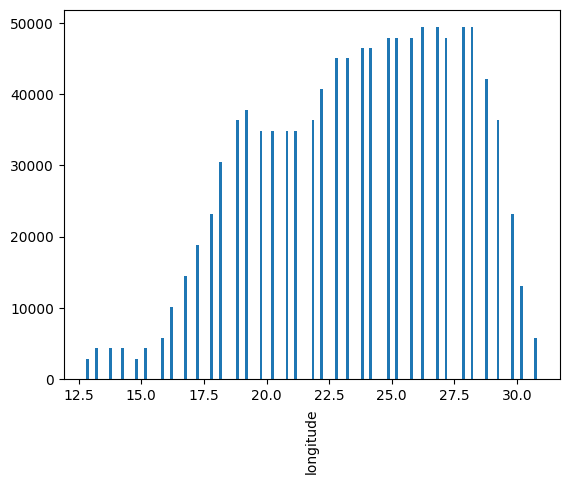

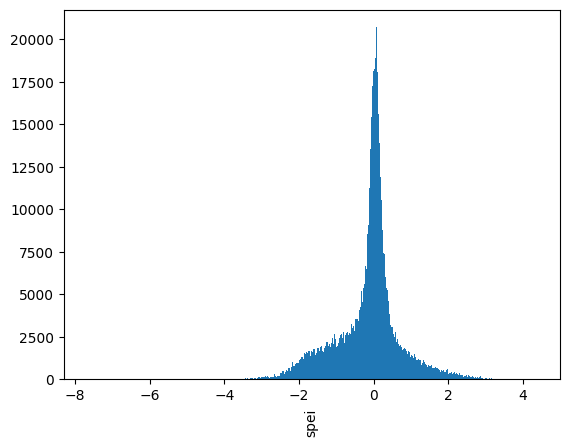

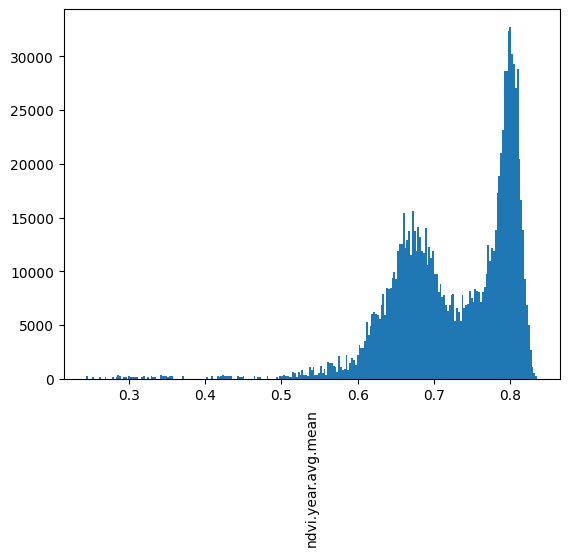

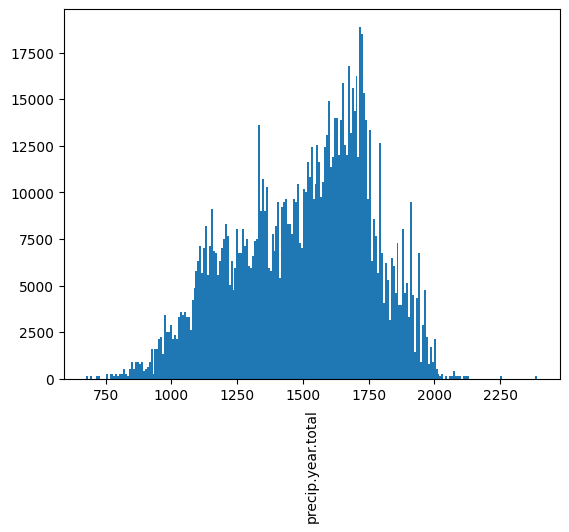

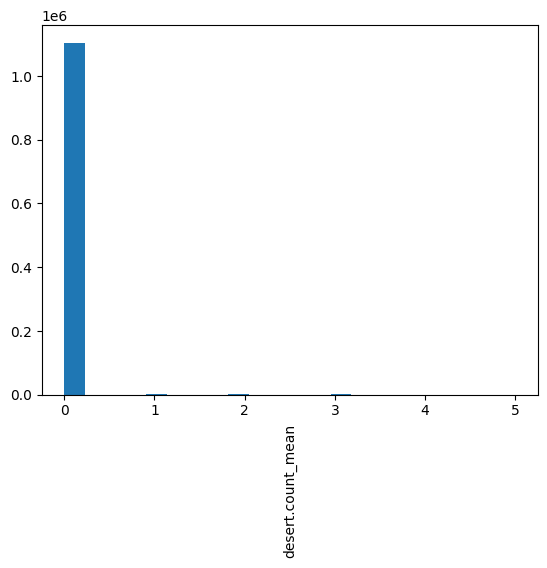

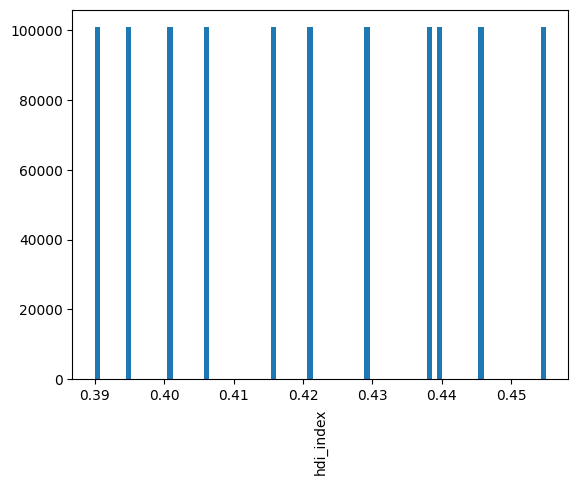

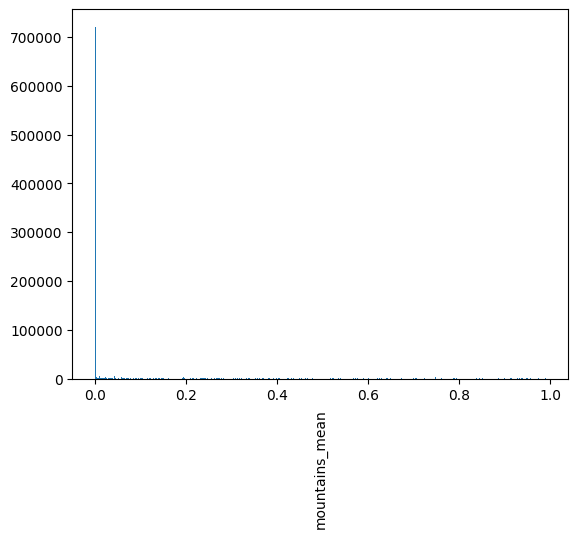

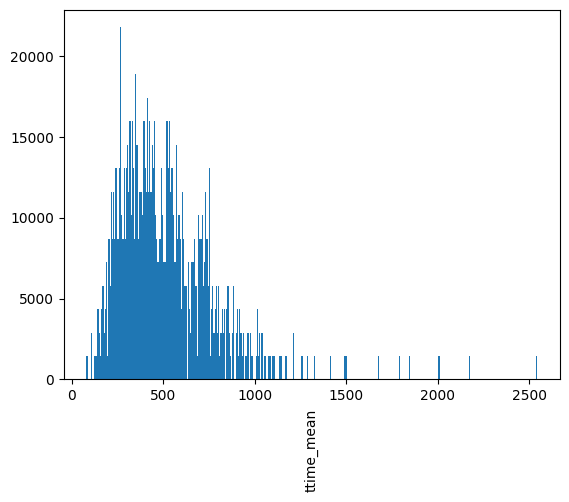

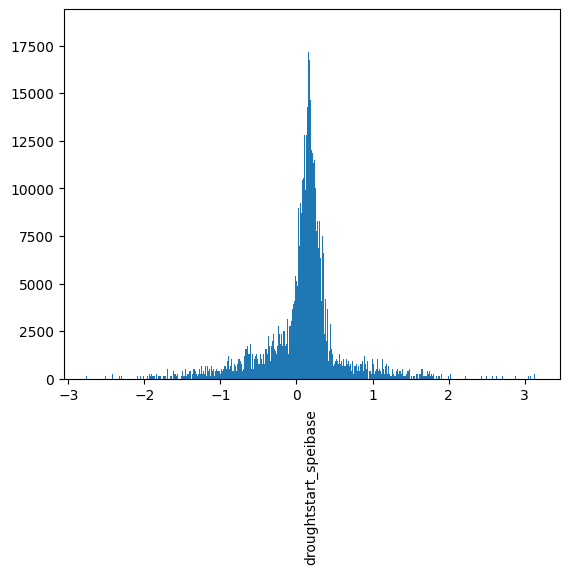

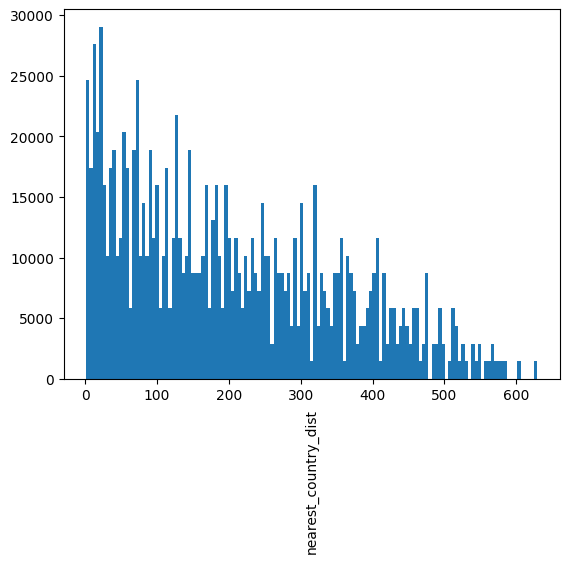

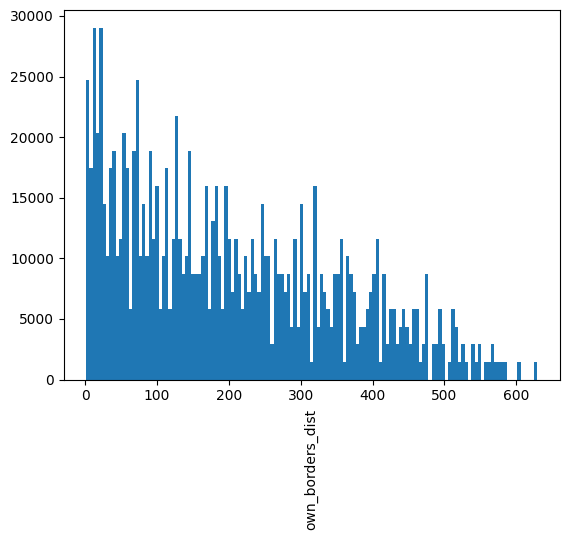

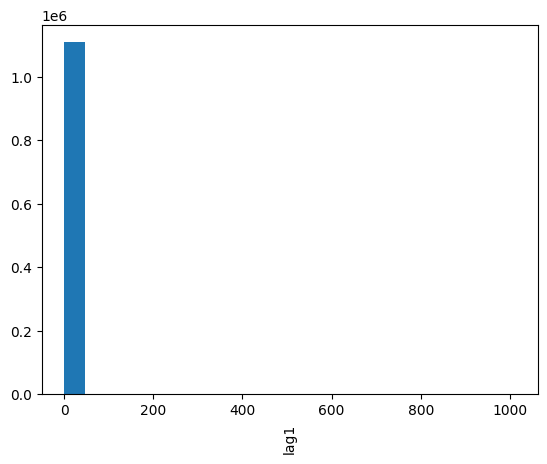

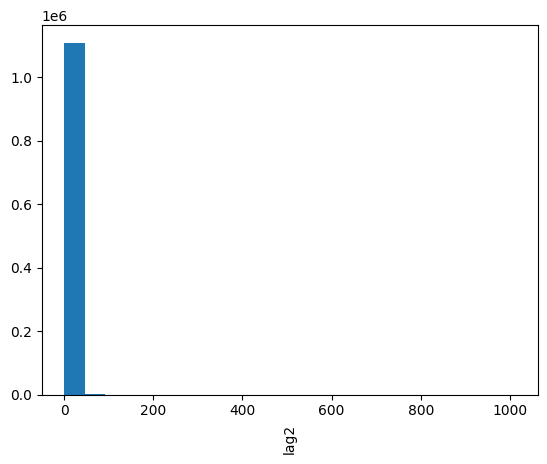

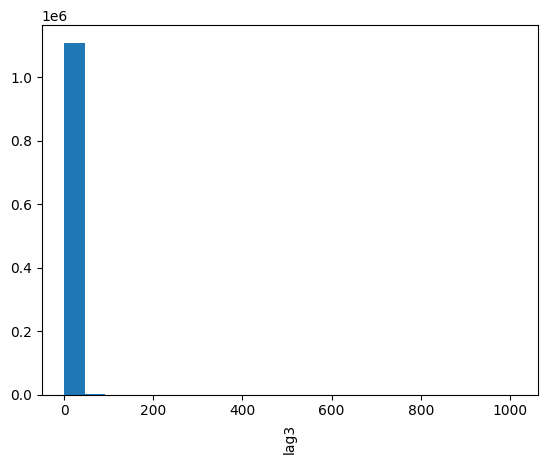

In [7]:
#Variables distribution

#We plot all variables that are discrete as countplots, and all continous variables as histograms.

# Countplots for numeric variables that are discrete
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
object_cols = df.select_dtypes(include='object')

for col in numeric_cols:
    if df[col].nunique() <= 5 and len(df[col].dropna()) > 0:  
        sns.countplot(x=col, data=df, palette="Set3")
        plt.xlabel(col, rotation=90)  
        plt.show()

for col in object_cols:
    if len(df[col].dropna()) > 0:  # Check if the variable has data points
        sns.countplot(x=col, data=df, palette="Set3")
        plt.xlabel(col, rotation=90)  
        plt.show()

# Histograms for numeric columns that are continuous
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
for col in numeric_cols:
    if df[col].nunique() > 5 and len(df[col].dropna()) > 0:  # Check if the variable is continuous and has data points
        plt.hist(df[col].dropna(), bins='auto')
        plt.xlabel(col, rotation=90)  # Rotate the label 90 degrees
        plt.show()

In [8]:
#We instantiate here df2 for its future usage n the correlation matrix
df2=df.copy()

In [9]:
#We will create a low fidelity model in order to check for the variables importance, which will assess us in 
#a better multicollinear variables elimination.


#We first split the target and the other features, and do a standard train-test-split
X=df.drop(["target"], axis=1)
y=df["target"]

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

#We encode inside a function (which will be used later on) the data transformation required
def data_preparation(dataset):
    cat_imp = SimpleImputer(strategy="most_frequent")
    num_imp = SimpleImputer(strategy="median")
    onehot = OneHotEncoder(sparse=False)
    inner_steps = [("simple_imputer", cat_imp), ("onehot", onehot)]
    inner_pipe = Pipeline(inner_steps)

    categorical_cols = X.select_dtypes(include="object").columns
    numerical_cols = X.select_dtypes(include=["int", "float"]).columns

    transformer = ColumnTransformer([
        ("innerpipeline", inner_pipe, categorical_cols),
        ("num_imputer", num_imp, numerical_cols)
    ], remainder="passthrough")
    return(transformer)


# Then, we create the definitive pipeline, scaling all different values with StandardScaler
# and using linear regression.

scaler = StandardScaler()
linear_reg = LinearRegression()
steps = [("transformer", data_preparation(df)), ("scaler", scaler), ("linear_reg", linear_reg)]
pipe = Pipeline(steps)
pipe.fit(X_train, y_train)

#And we output the prediction metrics: MSE and RSquared
y_pred = pipe.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse_linear)
print("R-squared:", r2_linear)

Mean Squared Error (MSE): 4.420192524748931
R-squared: 0.7234072563747127


In [10]:
# We get the linear regression model from the pipeline
linear_reg_model = pipe.named_steps["linear_reg"]

# We get the feature names and coefficientes, creating a list of tuples
categorical_cols = list(X.select_dtypes(include="object").columns)
numerical_cols = list(X.select_dtypes(include=["int", "float"]).columns)
feature_names = categorical_cols + numerical_cols
coefficients = linear_reg_model.coef_
feature_coefficient_pairs = list(zip(feature_names, coefficients))

# We sort and display them
feature_coefficient_pairs.sort(key=lambda x: abs(x[1]), reverse=True)
coefficients_df = pd.DataFrame(feature_coefficient_pairs, columns=["Feature", "Coefficient"])
coefficients_df["Coefficient"]=abs(coefficients_df["Coefficient"])
coefficients_df=coefficients_df.sort_values("Coefficient", ascending=False)
coefficients_df

,Feature,Coefficient
0,pitf_multiple_camp,4.826676e+10
1,pitf_multiple_inc,4.826676e+10
2,ged_viol_tot,3.940224e+10
3,ged_viol_nonstate,3.361729e+10
4,ged_viol_state,1.510437e+10
5,pitf_nonstate_sanc_camp,7.586914e+09
6,pitf_nonstate_sanc_inc,4.839098e+09
7,pitf_trans_camp,3.817348e+09
8,pitf_state_camp,3.014997e+09
9,desert.year,2.674219e+09


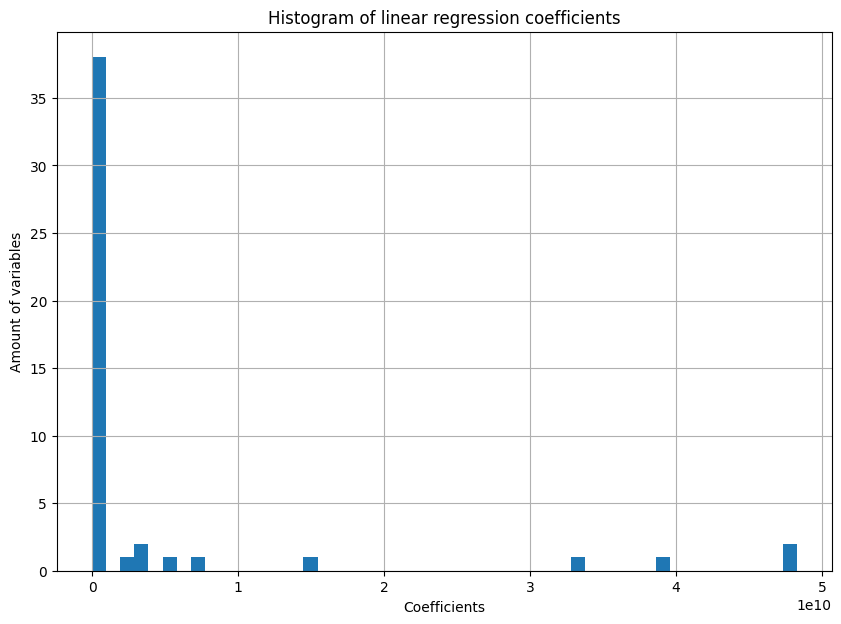

Based on our linear Regression, we have 36 features with coefficients <7.816832e+10


In [11]:
# We plot the histogram of values for a proper visualization and determination of importance threshold.

plt.figure(figsize=(10,7)) # increase the figure size
coefficients_df["Coefficient"].hist(bins=50)
plt.xlabel("Coefficients")
plt.ylabel("Amount of variables")
plt.title("Histogram of linear regression coefficients")
plt.show()

# Based on that, we create a list of variables with less than 1 in terms of importance.

unimportant=list(coefficients_df[coefficients_df["Coefficient"]<1]["Feature"])

print(f'Based on our linear Regression, we have {len(unimportant)} features with coefficients <7.816832e+10')

In [12]:
# We analyze multicollinearity by creating a temporary dataframe with encoding for exploration. We display the
# pairs graphically, and then, in a dataframe format to clean one of the variables with more than 75% of 
# correlation.

# We encode all categorical features, recovering df2 from before
categorical_cols = df2.select_dtypes(include='object').columns.tolist()
df2_encoded = pd.get_dummies(df2, columns=categorical_cols)
df2_encoded

,year,month,ged_state,ged_nonstate,ged_viol_tot,ged_viol_state,ged_viol_nonstate,acled_riots,acled_protests,pitf_state_inc,...,goldsurface_s,mountains_mean,ttime_mean,droughtstart_speibase,nearest_country_dist,own_borders_dist,target,lag1,lag2,lag3
0,2004,1,0,0,0,0,0,0.0,0.0,0.0,...,NaN,0.074722,777.7450,0.200284,15.00925,15.00925,0,NaN,NaN,NaN
52282,2004,1,0,0,0,0,0,0.0,0.0,0.0,...,1.0,0.001667,460.0217,0.117350,72.62237,72.62237,0,0.0,NaN,NaN
747790,2004,1,0,0,0,0,0,0.0,0.0,0.0,...,1.0,0.000000,599.4283,0.122185,373.03820,373.03820,0,0.0,0.0,NaN
747789,2004,1,0,0,0,0,0,0.0,0.0,0.0,...,1.0,0.000000,599.4283,-0.518676,373.03820,373.03820,0,0.0,0.0,0.0
747788,2004,1,0,0,0,0,0,0.0,0.0,0.0,...,1.0,0.000000,599.4283,-0.185648,373.03820,373.03820,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734710,2014,12,0,0,0,0,0,0.0,0.0,0.0,...,1.0,0.521945,477.7694,0.018921,148.64100,148.64100,0,0.0,0.0,0.0
734711,2014,12,0,0,0,0,0,0.0,0.0,0.0,...,1.0,0.521945,477.7694,0.021760,148.64100,148.64100,0,0.0,0.0,0.0
736153,2014,12,0,0,0,0,0,0.0,0.0,0.0,...,1.0,0.622222,348.6997,NaN,93.66878,93.66878,0,0.0,0.0,0.0
736155,2014,12,0,0,0,0,0,0.0,0.0,0.0,...,1.0,0.622222,348.6997,1.095452,93.66878,93.66878,0,0.0,0.0,0.0


In [13]:
#We create the correlation matrix numerically without displaying it.

corr_matrix=df2_encoded.corr().round(2)

correlated_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# We get the pairs with correlation greater than a threshold (here, 0.75).
threshold = 0.75
correlated_pairs = correlated_pairs[correlated_pairs > threshold]

# We ddrop the diagonal values, with perfect correlation with the own variable.
correlated_pairs = correlated_pairs[correlated_pairs != 1]
print(correlated_pairs)

ged_viol_nonstate  ged_viol_tot         0.92
ged_viol_tot       ged_viol_nonstate    0.92
p.anom             spei                 0.86
spei               p.anom               0.86
NDVI_mean          NDVI_max             0.78
NDVI_max           NDVI_mean            0.78
dtype: float64


In [14]:
# Then, we treat this Series Index as a list, join them together and take out only those features that are
# unique, which can be carried out with the set() method.

correlated_variables=list(correlated_pairs.index)
correlated_variables

variables_repeated=[]
for pair in correlated_variables:
    variables_repeated.append(pair[0])
    variables_repeated.append(pair[1])

multicollinearity=list(set(variables_repeated))

print('We have {} correlated variables with Pearson >75%.'.format(len(multicollinearity)))

We have 6 correlated variables with Pearson >75%.


In [15]:
# Next step is based on taking out of the multicollinearity list those variables that are correlated
# in a high degree and that have a low importance. 

rubbish_variables=list(set(multicollinearity) & set(unimportant))
rubbish_variables

print(f'Variables >0.75 of correlation and <1 of coefficient are dropped, eliminating {len(rubbish_variables)}.')

Variables >0.75 of correlation and <1 of coefficient are dropped, eliminating 4.


In [16]:
#Variables elimination

df.drop(rubbish_variables, axis=1, inplace=True)

print(f'We end up with {df.shape[1]}.')

We end up with 45.


In [17]:
#Train-test split : RANDOM FOREST

X=df.drop("target", axis=1)
y=df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [18]:
# We create the random forest regressor
scaler = StandardScaler()
rf_regressor = RandomForestRegressor()
steps = [("transformer", data_preparation(X)), ("scaler", scaler), ("random_forest", rf_regressor)]
pipe = Pipeline(steps)

# We then define the hyperparameters to tune
param_grid = {
    'random_forest__n_estimators': [100],
    'random_forest__max_depth': [None, 5, 10],
    'random_forest__min_samples_split': [5],
    'random_forest__min_samples_leaf': [1, 2],
    'random_forest__max_features': ['auto', 'sqrt']
}

# We create the GridSearchCV object with 3-fold cross-validation (optimization purposes)
grid_search = GridSearchCV(pipe, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# We get the best model and its corresponding parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# And use the best model to make predictions on the test data, ouputing the prediction metrics
y_pred = best_model.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred)
r2_forest = r2_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Mean Squared Error (MSE):", mse_forest)
print("R-squared:", r2_forest)

Best Parameters: {'random_forest__max_depth': None, 'random_forest__max_features': 'sqrt', 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 5, 'random_forest__n_estimators': 100}
Mean Squared Error (MSE): 0.2112715567644313
R-squared: 0.9867797207455847


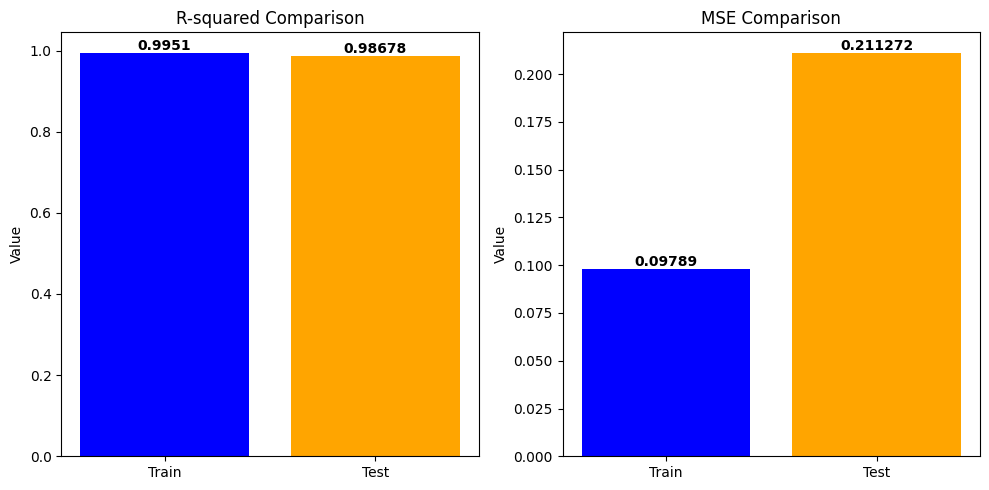

In [19]:
# overfitting check
y_train_pred=best_model.predict(X_train)

# We calculate R-squared and MSEfor train and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)

# We create bar plots for R-squared and MSE
metrics = ['Train', 'Test']  # Updated labels for columns
train_values = [r2_train, mse_train]
test_values = [r2_test, mse_test]

#R-squared
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.bar(metrics, [train_values[0], test_values[0]], color=['blue', 'orange'])
ax1.set_ylabel('Value')
ax1.set_title('R-squared Comparison')
for i, v in enumerate([train_values[0], test_values[0]]):
    ax1.text(i, v, str(round(v, 6)), ha='center', va='bottom', fontweight='bold')

# MSE
ax2.bar(metrics, [train_values[1], test_values[1]], color=['blue', 'orange'])
ax2.set_ylabel('Value')
ax2.set_title('MSE Comparison')
for i, v in enumerate([train_values[1], test_values[1]]):
    ax2.text(i, v, str(round(v, 6)), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

Feature Importance:
pitf_multiple_inc : 0.13485103076412766
lag1 : 0.11299172960341247
pitf_multiple_camp : 0.11156627836668762
ged_viol_tot : 0.08789129574905662
acled_protests : 0.061224849881474655
ged_viol_nonstate : 0.05547455865148277
ged_state : 0.05184408295030174
lag2 : 0.04335782002584047
lag3 : 0.038785550767266946
ged_nonstate : 0.03564265416106258
acled_riots : 0.029523377900846696
NDVI_min : 0.01716633389276873
ndvi.year.avg.mean : 0.017039693374085518
t.anom : 0.016629115274191298
hdi_index : 0.016100382552954415
t.c.avg : 0.015813060623992577
population : 0.015358155594603042
ged_viol_state : 0.015202500644448303
precip.year.total : 0.013998658484381582
NL_sum : 0.013404165957113502
nearest_country_dist : 0.012318253168333324
year : 0.011599755399101089
p.avg : 0.011256909532893789
own_borders_dist : 0.010709132119619541
month : 0.010519263620469814
longitude : 0.008826806918482656
ttime_mean : 0.008338392344844037
mountains_mean : 0.008228910539939271
latitude : 0.0065

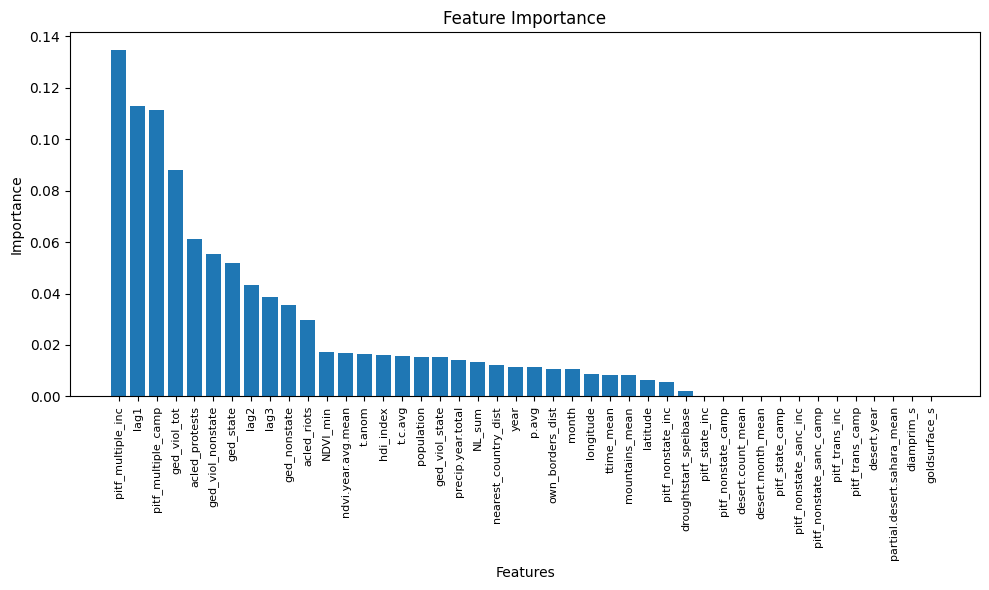

In [20]:
# We fit the best model on the entire training data
best_model.fit(X_train, y_train)

#We extract feature importances
importance = best_model.named_steps['random_forest'].feature_importances_
feature_importance_dict = dict(zip(X.columns, importance))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(feature, ":", importance)

# And we plot them
features = [item[0] for item in sorted_feature_importance]
importances = [item[1] for item in sorted_feature_importance]
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(range(len(features)), importances)
plt.xticks(range(len(features)), features, rotation=90, fontsize=8)  # Smaller x-labels with fontsize=8
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()  # Adjust the spacing of the plot elements
plt.show()

## Second Model: Gradient Boosted Tree

In this case, there will be no hyperparameterization, although we will integrate the functionality of ```XGBRegressor()``` inside Scikit-learn structures.

As the model is more nimble, we will analyze overfitting and feature importance lists for each one of the 12 months, as well as plotting all the features importance for each model.

In [21]:
#Train-test split

X=df.drop("target", axis=1)
y=df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [22]:
#Model creation with the data_preparation function

scaler = StandardScaler()
boosted=XGBRegressor(objective='reg:squarederror')
steps = [("transformer", data_preparation(X)), ("scaler", scaler), ("model", boosted)]
pipe = Pipeline(steps)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

mse_boosted = mean_squared_error(y_test, y_pred)
r2_boosted = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse_boosted)
print("R-squared:", r2_boosted)

Mean Squared Error: 0.2714080091420012
R-squared: 0.9830166931711357


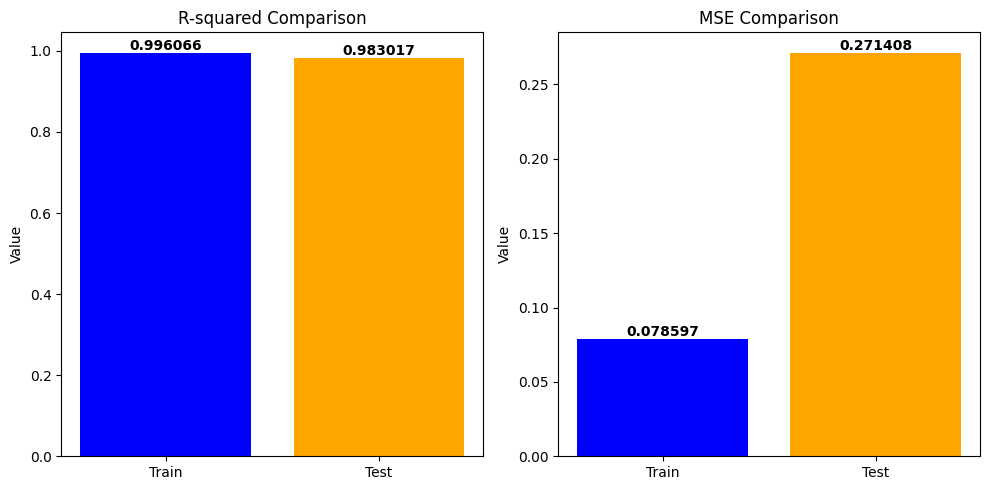

In [23]:
y_train_pred=pipe.predict(X_train)

# Calculate R-squared for train and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

# Calculate MSE for train and test sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)

# Create bar plots for R-squared and MSE
metrics = ['Train', 'Test']  # Updated labels for columns
train_values = [r2_train, mse_train]
test_values = [r2_test, mse_test]

# Plotting the side-by-side bar plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot for R-squared
ax1.bar(metrics, [train_values[0], test_values[0]], color=['blue', 'orange'])
ax1.set_ylabel('Value')
ax1.set_title('R-squared Comparison')

# Add text labels on top of each column
for i, v in enumerate([train_values[0], test_values[0]]):
    ax1.text(i, v, str(round(v, 6)), ha='center', va='bottom', fontweight='bold')

# Bar plot for MSE
ax2.bar(metrics, [train_values[1], test_values[1]], color=['blue', 'orange'])
ax2.set_ylabel('Value')
ax2.set_title('MSE Comparison')

# Add text labels on top of each column
for i, v in enumerate([train_values[1], test_values[1]]):
    ax2.text(i, v, str(round(v, 6)), ha='center', va='bottom', fontweight='bold')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

Feature Importance:
pitf_multiple_inc : 0.9419312
nearest_country_dist : 0.0108515145
lag1 : 0.008658234
ged_state : 0.0044620656
ttime_mean : 0.004248081
latitude : 0.003058949
NDVI_min : 0.002866645
ndvi.year.avg.mean : 0.002641183
ged_nonstate : 0.0026133056
ged_viol_nonstate : 0.0022791834
p.avg : 0.0022757011
ged_viol_state : 0.0021751316
ged_viol_tot : 0.0017217204
t.c.avg : 0.0016078395
pitf_nonstate_inc : 0.0013533145
population : 0.0011121153
longitude : 0.0011022032
precip.year.total : 0.00087490253
t.anom : 0.0007777936
month : 0.00060957717
NL_sum : 0.00050655386
lag2 : 0.00046602509
lag3 : 0.000454729
year : 0.00044287406
acled_protests : 0.0003324273
mountains_mean : 0.00032040983
acled_riots : 0.00013465402
droughtstart_speibase : 7.7359095e-05
pitf_nonstate_camp : 2.5342337e-05
pitf_state_inc : 1.9014287e-05
pitf_state_camp : 0.0
pitf_nonstate_sanc_inc : 0.0
pitf_nonstate_sanc_camp : 0.0
pitf_multiple_camp : 0.0
pitf_trans_inc : 0.0
pitf_trans_camp : 0.0
desert.year : 0

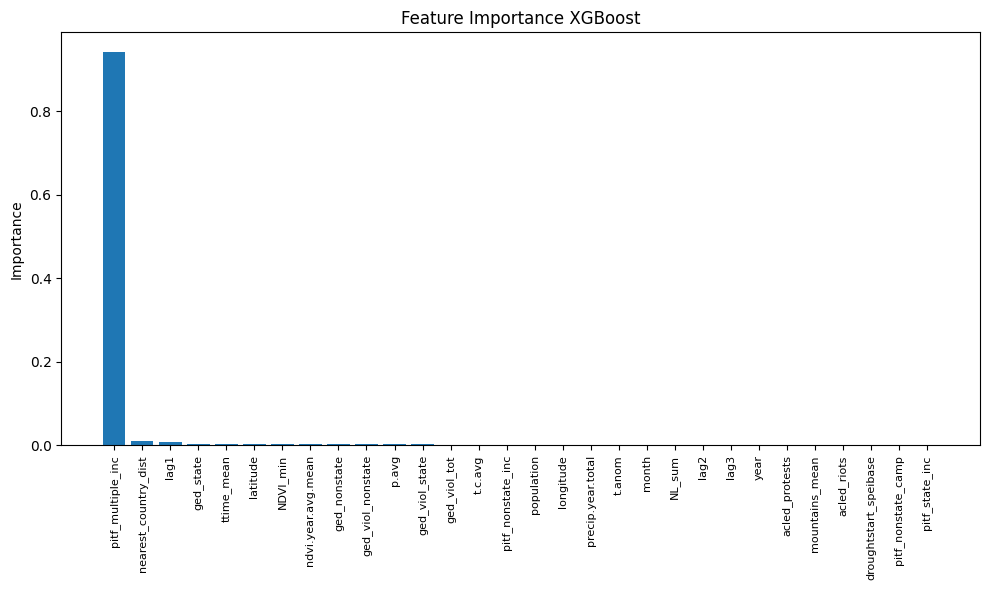

In [24]:
# We extract feature importance from the XGBoost model
importance = pipe.named_steps['model'].feature_importances_

# We put a dictionary to store the values
feature_importance_dict = dict(zip(X.columns, importance))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# We print the feature importance list
print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(feature, ":", importance)

# Filter out variables with importance equal to 0
filtered_feature_importance = [(feature, importance) for feature, importance in sorted_feature_importance if importance != 0]

# Extract feature names and importances for plotting
features = [item[0] for item in filtered_feature_importance]
importances = [item[1] for item in filtered_feature_importance]

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(range(len(features)), importances)
plt.xticks(range(len(features)), features, rotation=90, fontsize=8)
plt.ylabel('Importance')
plt.title('Feature Importance XGBoost')
plt.tight_layout()
plt.show()

Month: 1
Mean Squared Error: 0.2714080091420012
R-squared: 0.9643244385673261


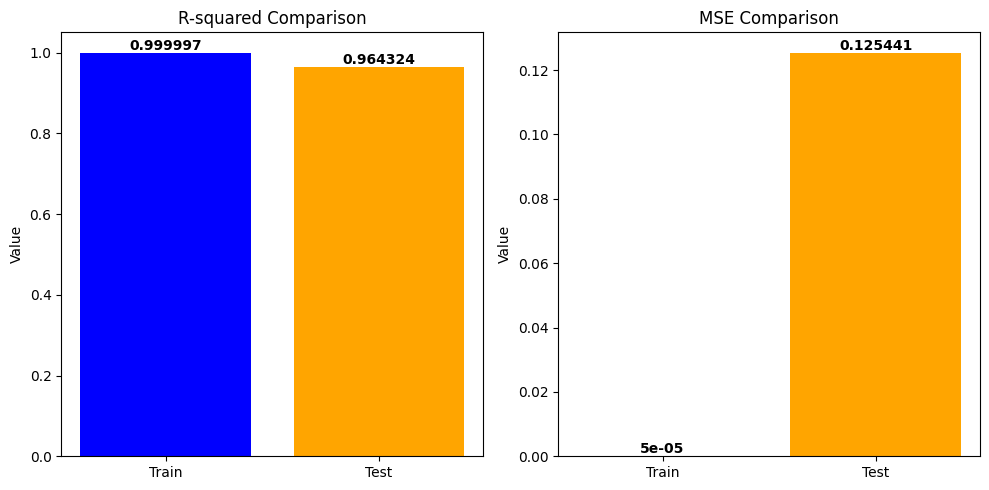

Feature Importance for month 1:
ged_nonstate : 0.25955024
lag1 : 0.18198477
ged_viol_nonstate : 0.14914277
t.anom : 0.1411103
ged_state : 0.0507321
year : 0.04980013
ged_viol_tot : 0.04741618
nearest_country_dist : 0.031591352
longitude : 0.0151489945
lag3 : 0.014303866
population : 0.013923489
NL_sum : 0.011870276
precip.year.total : 0.006434765
pitf_nonstate_inc : 0.0061051943
NDVI_min : 0.0057187937
p.avg : 0.0046981433
ttime_mean : 0.004046653
mountains_mean : 0.0038886857
t.c.avg : 0.0010896014
ndvi.year.avg.mean : 0.000629311
latitude : 0.00035068774
ged_viol_state : 0.0001941519
droughtstart_speibase : 0.00014586543
lag2 : 8.446673e-05
acled_protests : 3.917493e-05
month : 0.0
acled_riots : 0.0
pitf_state_inc : 0.0
pitf_state_camp : 0.0
pitf_nonstate_sanc_inc : 0.0
pitf_nonstate_sanc_camp : 0.0
pitf_nonstate_camp : 0.0
pitf_multiple_inc : 0.0
pitf_multiple_camp : 0.0
pitf_trans_inc : 0.0
pitf_trans_camp : 0.0
desert.year : 0.0
desert.month_mean : 0.0
desert.count_mean : 0.0
part

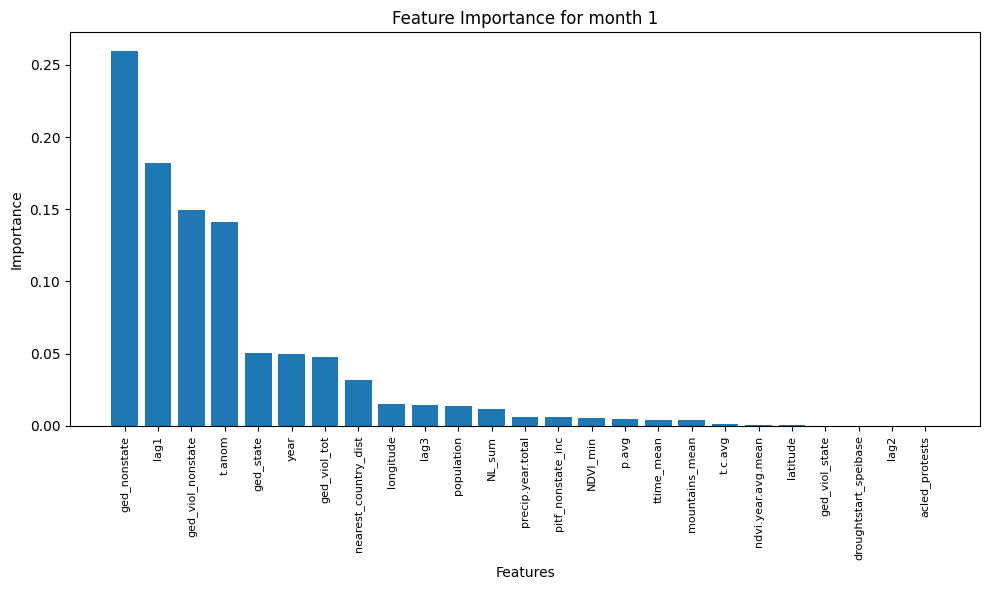

Month: 2
Mean Squared Error: 0.2714080091420012
R-squared: 0.9970743535233405


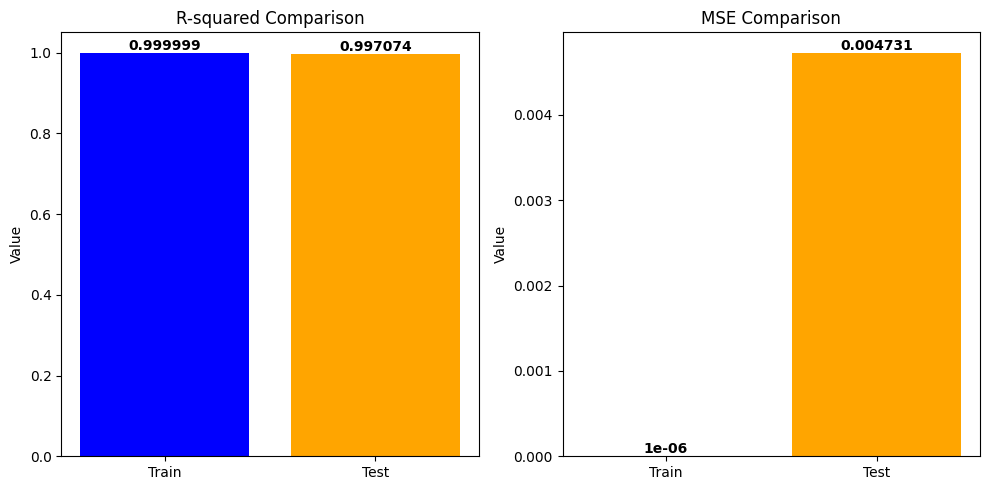

Feature Importance for month 2:
ged_state : 0.2323552
t.anom : 0.20256196
ged_viol_tot : 0.12675963
lag1 : 0.106950544
t.c.avg : 0.09803337
ndvi.year.avg.mean : 0.06746654
latitude : 0.03944315
ged_viol_state : 0.034741472
acled_riots : 0.024455998
year : 0.018951828
precip.year.total : 0.011008452
NL_sum : 0.008004014
ttime_mean : 0.007946782
NDVI_min : 0.007336905
longitude : 0.0057447334
population : 0.0052723866
p.avg : 0.0012755326
ged_viol_nonstate : 0.0010280509
mountains_mean : 0.00043376602
droughtstart_speibase : 0.0001425646
nearest_country_dist : 6.724124e-05
lag2 : 1.6163975e-05
lag3 : 3.2089974e-06
ged_nonstate : 6.232985e-07
acled_protests : 2.1740008e-09
month : 0.0
pitf_state_inc : 0.0
pitf_state_camp : 0.0
pitf_nonstate_sanc_inc : 0.0
pitf_nonstate_sanc_camp : 0.0
pitf_nonstate_inc : 0.0
pitf_nonstate_camp : 0.0
pitf_multiple_inc : 0.0
pitf_multiple_camp : 0.0
pitf_trans_inc : 0.0
pitf_trans_camp : 0.0
desert.year : 0.0
desert.month_mean : 0.0
desert.count_mean : 0.0


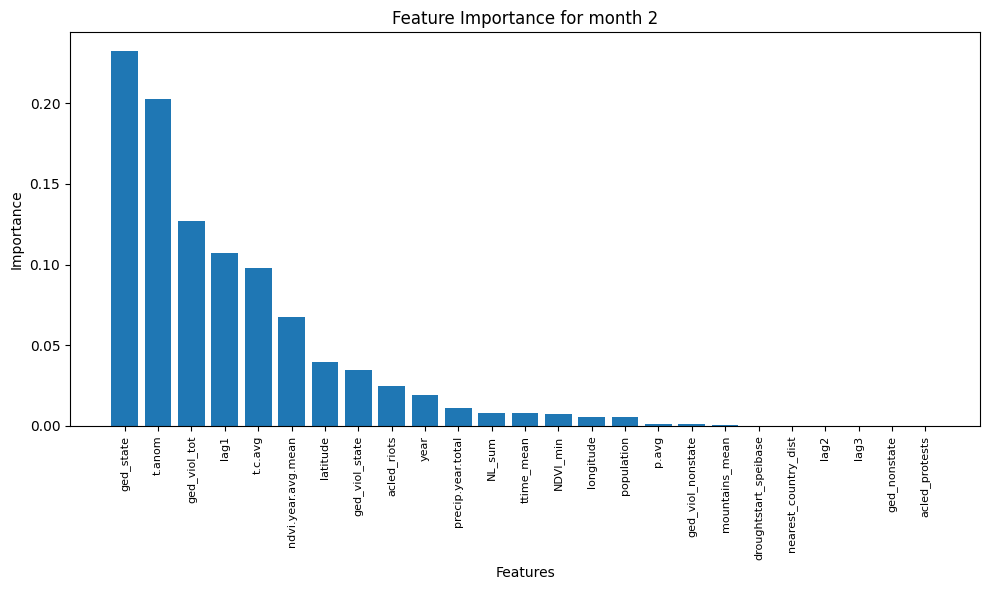

Month: 3
Mean Squared Error: 0.2714080091420012
R-squared: 0.9994325341323833


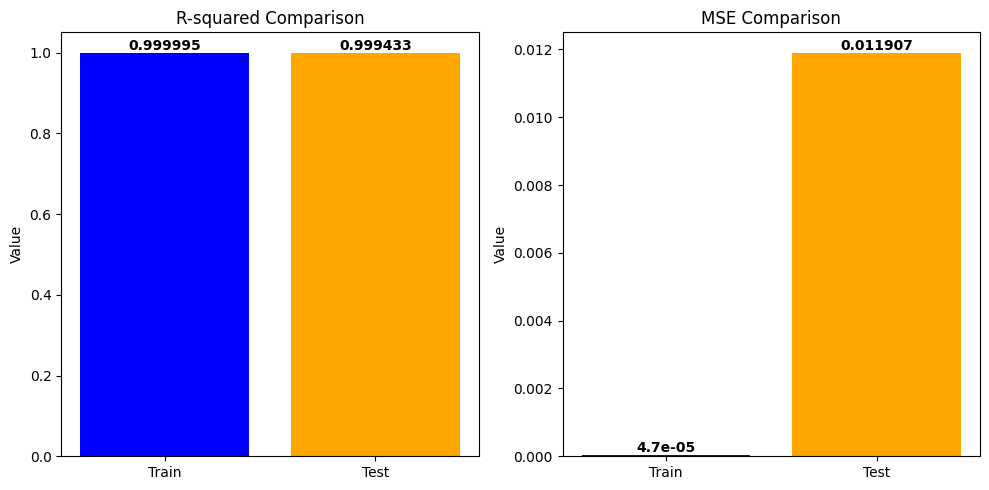

Feature Importance for month 3:
ged_nonstate : 0.5925386
ged_viol_state : 0.14700304
ged_viol_tot : 0.09850127
precip.year.total : 0.04323206
year : 0.034454443
ged_state : 0.031994525
lag1 : 0.014651911
NDVI_min : 0.006906682
ttime_mean : 0.006905594
ged_viol_nonstate : 0.005685325
t.anom : 0.0046794754
nearest_country_dist : 0.0029982761
acled_riots : 0.0019774232
latitude : 0.0018941376
population : 0.0013337603
NL_sum : 0.0012632901
ndvi.year.avg.mean : 0.00091251667
p.avg : 0.00087845704
lag2 : 0.0007805168
longitude : 0.0007009149
t.c.avg : 0.00023316975
acled_protests : 0.00021232435
pitf_nonstate_inc : 0.00018665961
mountains_mean : 4.250803e-05
droughtstart_speibase : 3.2280972e-05
lag3 : 9.242998e-07
month : 0.0
pitf_state_inc : 0.0
pitf_state_camp : 0.0
pitf_nonstate_sanc_inc : 0.0
pitf_nonstate_sanc_camp : 0.0
pitf_nonstate_camp : 0.0
pitf_multiple_inc : 0.0
pitf_multiple_camp : 0.0
pitf_trans_inc : 0.0
pitf_trans_camp : 0.0
desert.year : 0.0
desert.month_mean : 0.0
desert.

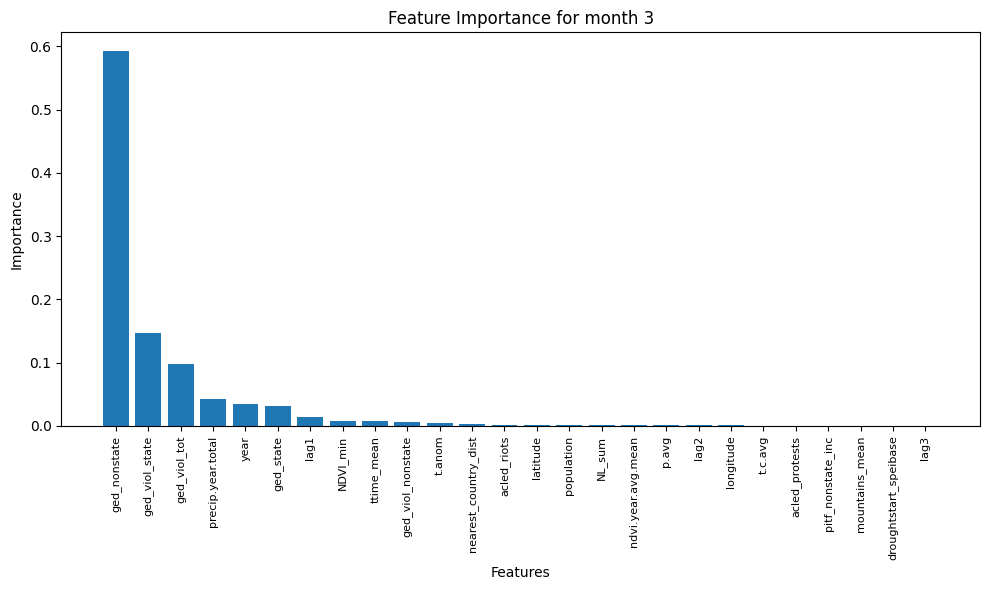

Month: 4
Mean Squared Error: 0.2714080091420012
R-squared: 0.9999275924928605


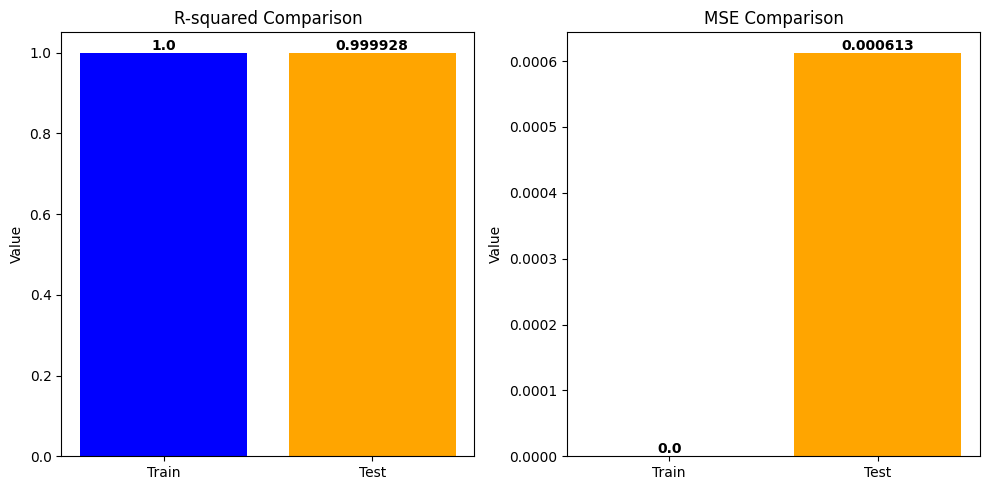

Feature Importance for month 4:
ged_viol_tot : 0.29495102
lag1 : 0.19641432
ndvi.year.avg.mean : 0.18108031
NDVI_min : 0.084140114
ged_state : 0.07178825
ged_viol_nonstate : 0.04292094
precip.year.total : 0.04154852
t.c.avg : 0.02400281
nearest_country_dist : 0.019970052
population : 0.012319004
ged_viol_state : 0.008356307
t.anom : 0.0080288425
year : 0.0043770266
mountains_mean : 0.0038759033
NL_sum : 0.0026548947
ttime_mean : 0.0012837118
p.avg : 0.001211197
longitude : 0.0005397079
latitude : 0.00051439315
acled_riots : 1.126622e-05
lag2 : 8.080516e-06
droughtstart_speibase : 2.5178877e-06
lag3 : 7.496724e-07
month : 0.0
ged_nonstate : 0.0
acled_protests : 0.0
pitf_state_inc : 0.0
pitf_state_camp : 0.0
pitf_nonstate_sanc_inc : 0.0
pitf_nonstate_sanc_camp : 0.0
pitf_nonstate_inc : 0.0
pitf_nonstate_camp : 0.0
pitf_multiple_inc : 0.0
pitf_multiple_camp : 0.0
pitf_trans_inc : 0.0
pitf_trans_camp : 0.0
desert.year : 0.0
desert.month_mean : 0.0
desert.count_mean : 0.0
partial.desert.sah

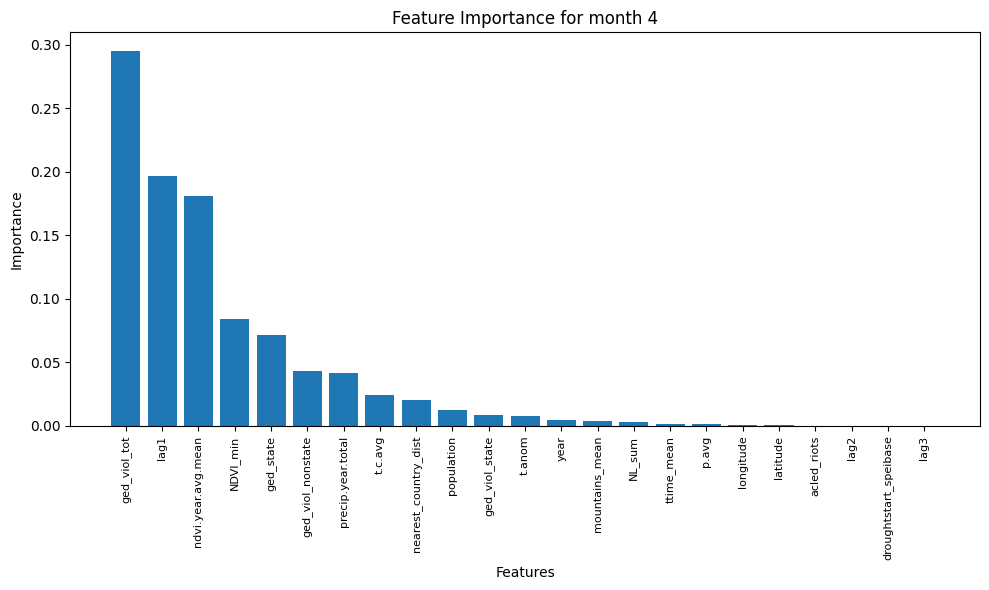

Month: 5
Mean Squared Error: 0.2714080091420012
R-squared: 0.9298165766757985


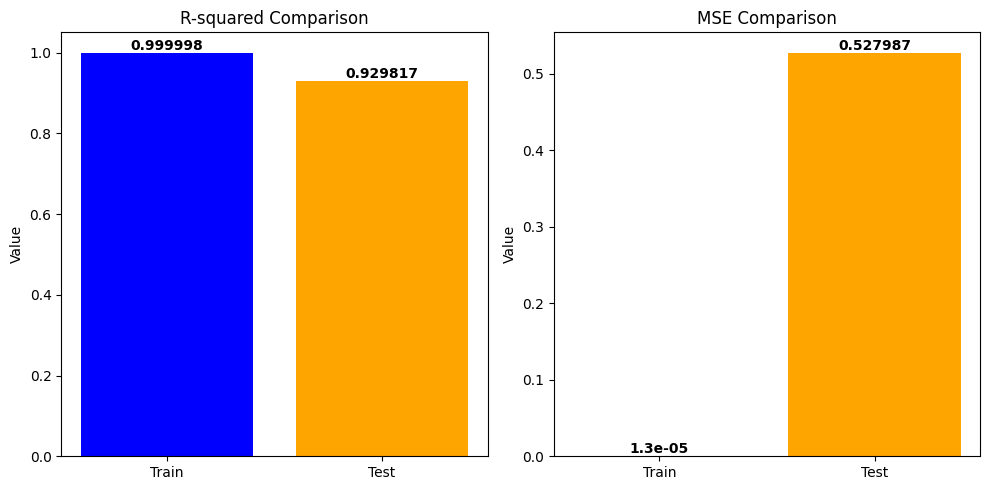

Feature Importance for month 5:
ged_viol_tot : 0.32145503
lag1 : 0.2735413
ged_state : 0.22018522
NL_sum : 0.07469706
year : 0.039465543
population : 0.026251689
ged_viol_nonstate : 0.01650715
mountains_mean : 0.00695343
ndvi.year.avg.mean : 0.0059483508
precip.year.total : 0.005312528
nearest_country_dist : 0.0027565488
t.c.avg : 0.0020752614
t.anom : 0.0017601061
ged_viol_state : 0.0010989954
NDVI_min : 0.0007453387
p.avg : 0.0004963186
longitude : 0.00029968529
ttime_mean : 0.00024477168
lag2 : 0.00014512226
ged_nonstate : 2.4353987e-05
droughtstart_speibase : 1.6200922e-05
latitude : 1.2293464e-05
acled_riots : 6.8100526e-06
lag3 : 9.2093313e-07
month : 0.0
acled_protests : 0.0
pitf_state_inc : 0.0
pitf_state_camp : 0.0
pitf_nonstate_sanc_inc : 0.0
pitf_nonstate_sanc_camp : 0.0
pitf_nonstate_inc : 0.0
pitf_nonstate_camp : 0.0
pitf_multiple_inc : 0.0
pitf_multiple_camp : 0.0
pitf_trans_inc : 0.0
pitf_trans_camp : 0.0
desert.year : 0.0
desert.month_mean : 0.0
desert.count_mean : 0.0


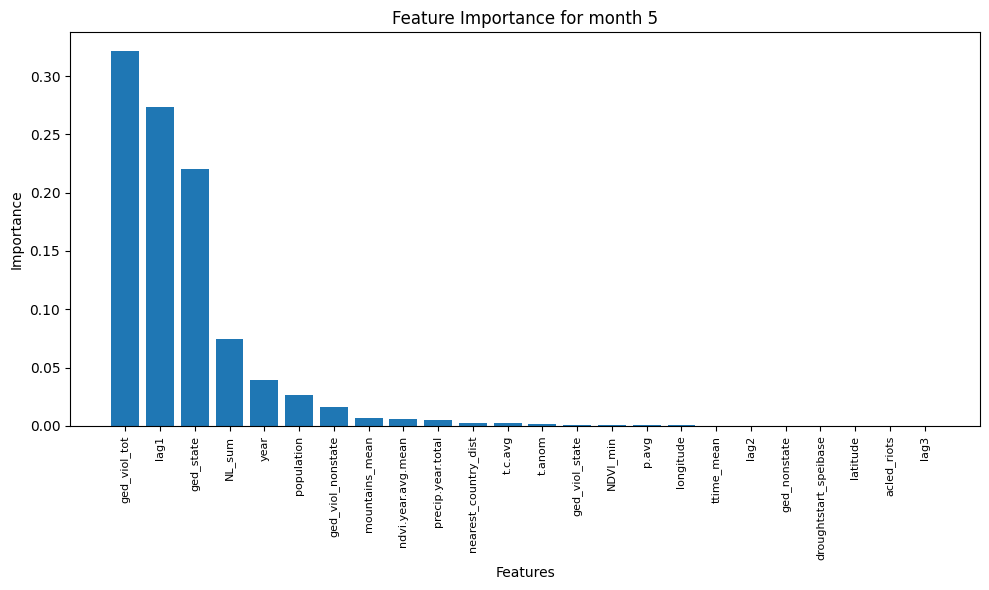

Month: 6
Mean Squared Error: 0.2714080091420012
R-squared: 0.9976055097754996


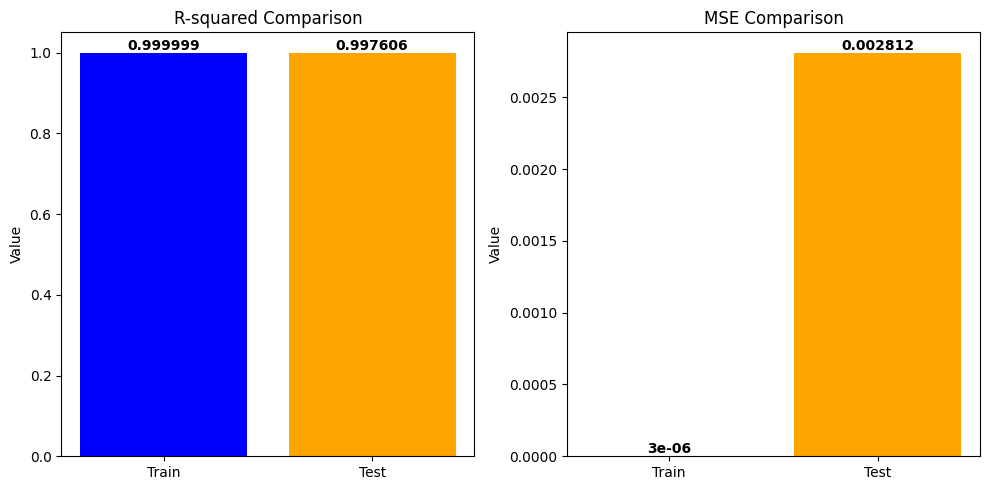

Feature Importance for month 6:
ged_state : 0.54306334
ged_viol_tot : 0.27691826
NL_sum : 0.04393424
lag1 : 0.031993594
ged_viol_nonstate : 0.025686182
ttime_mean : 0.013752651
population : 0.010554626
p.avg : 0.008836381
longitude : 0.00792478
year : 0.005617278
pitf_state_inc : 0.005611831
latitude : 0.0054393574
t.c.avg : 0.005365311
t.anom : 0.0047137327
lag2 : 0.00456176
precip.year.total : 0.0024462235
ged_viol_state : 0.0011819225
NDVI_min : 0.0009400839
ndvi.year.avg.mean : 0.0004453346
pitf_nonstate_inc : 0.0003369559
ged_nonstate : 0.0002656902
droughtstart_speibase : 0.00013024428
nearest_country_dist : 0.00012241692
mountains_mean : 8.825411e-05
acled_riots : 5.4180397e-05
lag3 : 1.5403071e-05
month : 0.0
acled_protests : 0.0
pitf_state_camp : 0.0
pitf_nonstate_sanc_inc : 0.0
pitf_nonstate_sanc_camp : 0.0
pitf_nonstate_camp : 0.0
pitf_multiple_inc : 0.0
pitf_multiple_camp : 0.0
pitf_trans_inc : 0.0
pitf_trans_camp : 0.0
desert.year : 0.0
desert.month_mean : 0.0
desert.count

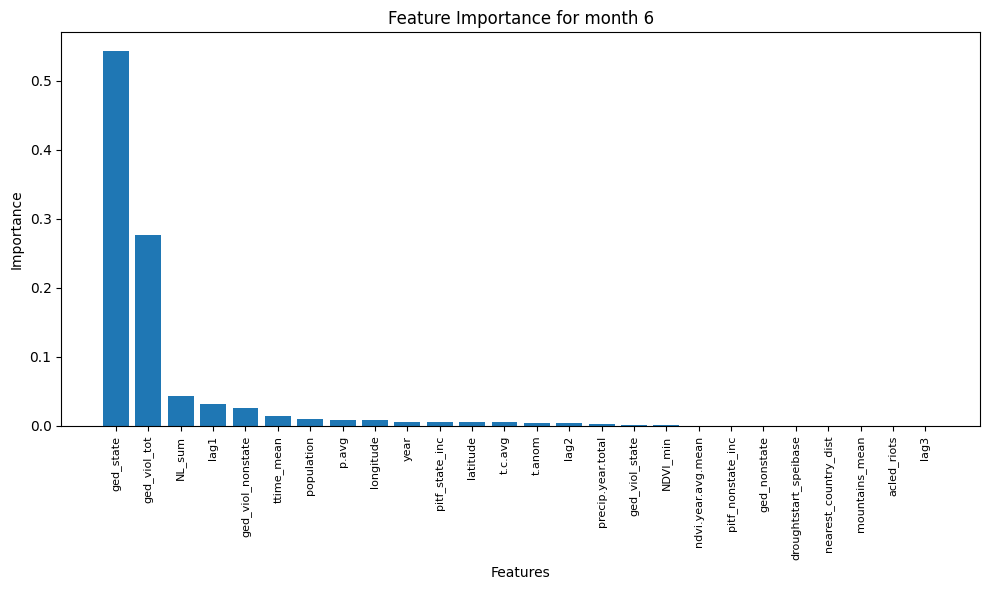

Month: 7
Mean Squared Error: 0.2714080091420012
R-squared: 0.9978158796169472


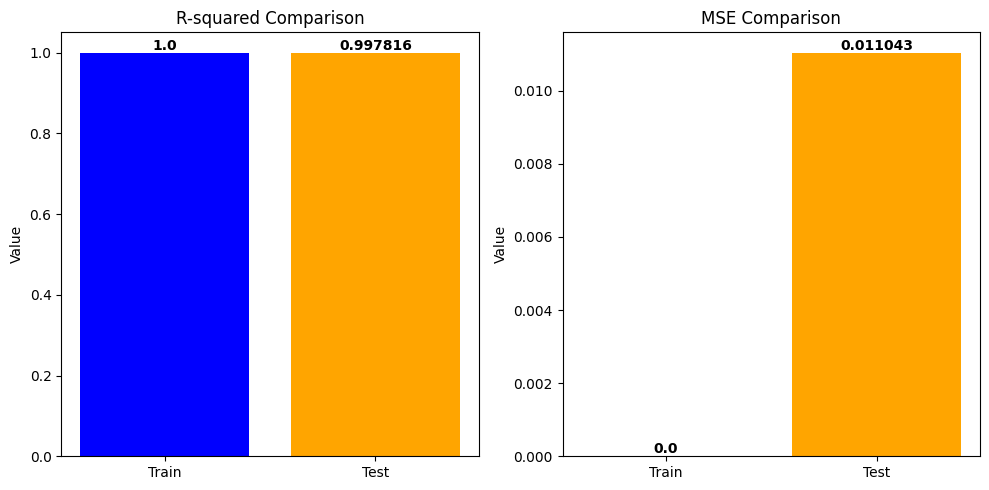

Feature Importance for month 7:
ndvi.year.avg.mean : 0.29142645
lag1 : 0.20969471
ged_state : 0.19157715
t.c.avg : 0.07445346
ged_viol_state : 0.051020235
NDVI_min : 0.04142491
year : 0.035726365
t.anom : 0.034089997
precip.year.total : 0.019657481
ged_viol_tot : 0.019355994
ged_viol_nonstate : 0.01640782
p.avg : 0.010548593
population : 0.0017158259
NL_sum : 0.0010601992
nearest_country_dist : 0.00083740056
mountains_mean : 0.0004433554
latitude : 0.00026534175
longitude : 0.00015892586
ttime_mean : 0.000101781385
droughtstart_speibase : 2.779855e-05
acled_protests : 4.515558e-06
lag3 : 1.1308078e-06
lag2 : 6.236255e-07
acled_riots : 1.4056055e-09
month : 0.0
ged_nonstate : 0.0
pitf_state_inc : 0.0
pitf_state_camp : 0.0
pitf_nonstate_sanc_inc : 0.0
pitf_nonstate_sanc_camp : 0.0
pitf_nonstate_inc : 0.0
pitf_nonstate_camp : 0.0
pitf_multiple_inc : 0.0
pitf_multiple_camp : 0.0
pitf_trans_inc : 0.0
pitf_trans_camp : 0.0
desert.year : 0.0
desert.month_mean : 0.0
desert.count_mean : 0.0
par

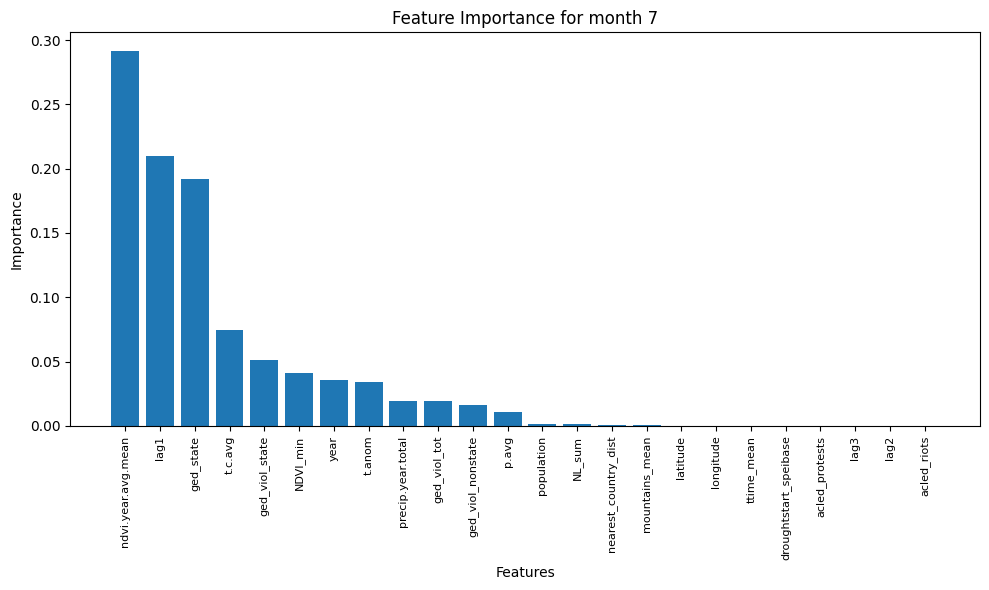

Month: 8
Mean Squared Error: 0.2714080091420012
R-squared: 0.5017020529972476


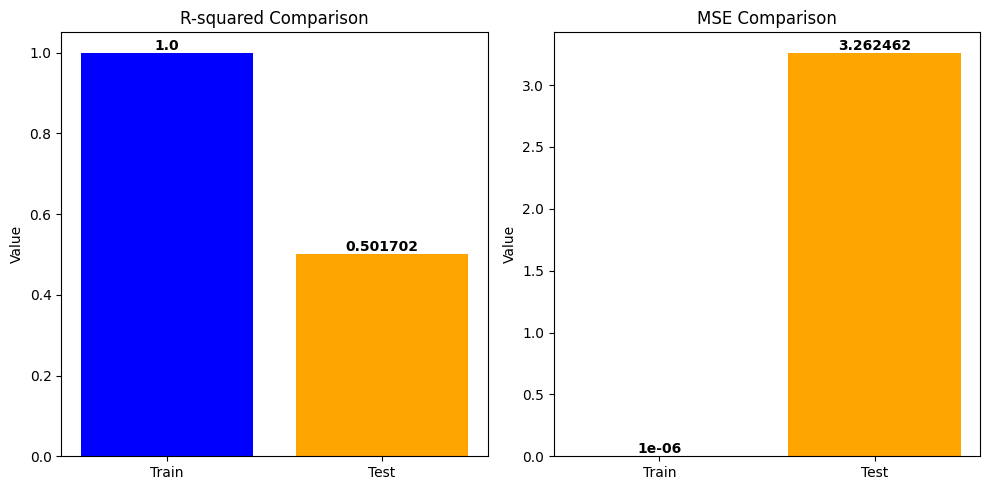

Feature Importance for month 8:
lag1 : 0.33004057
ged_state : 0.2160328
mountains_mean : 0.13428587
ged_nonstate : 0.11254243
ged_viol_tot : 0.092043124
NL_sum : 0.0342848
ndvi.year.avg.mean : 0.022051191
year : 0.018447416
precip.year.total : 0.017595377
ged_viol_nonstate : 0.00664156
t.anom : 0.0033636498
ged_viol_state : 0.0028920393
NDVI_min : 0.0026073232
t.c.avg : 0.0020616283
longitude : 0.0016181292
population : 0.0009451887
lag2 : 0.00080418575
p.avg : 0.0006710392
nearest_country_dist : 0.00047516212
latitude : 0.00044177586
acled_protests : 9.98874e-05
ttime_mean : 3.3157005e-05
droughtstart_speibase : 2.1131775e-05
lag3 : 4.834849e-07
acled_riots : 1.1524894e-08
month : 0.0
pitf_state_inc : 0.0
pitf_state_camp : 0.0
pitf_nonstate_sanc_inc : 0.0
pitf_nonstate_sanc_camp : 0.0
pitf_nonstate_inc : 0.0
pitf_nonstate_camp : 0.0
pitf_multiple_inc : 0.0
pitf_multiple_camp : 0.0
pitf_trans_inc : 0.0
pitf_trans_camp : 0.0
desert.year : 0.0
desert.month_mean : 0.0
desert.count_mean : 

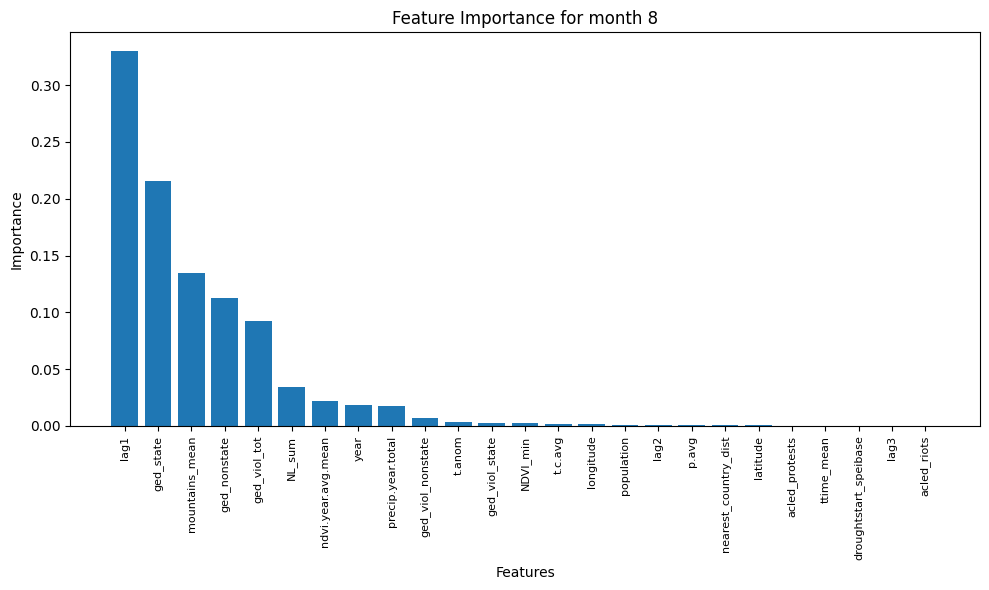

Month: 9
Mean Squared Error: 0.2714080091420012
R-squared: 0.9999986990969566


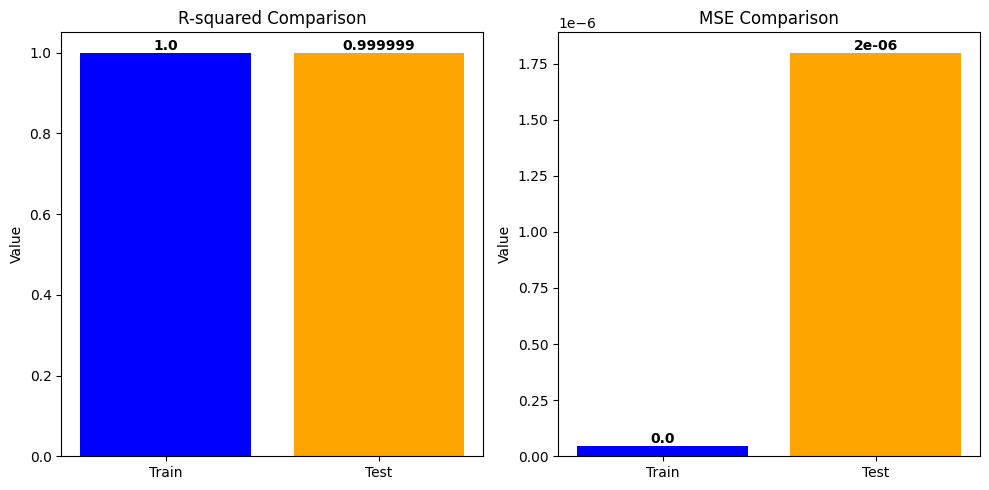

Feature Importance for month 9:
ged_state : 0.41049355
precip.year.total : 0.27145356
ged_viol_nonstate : 0.20396458
year : 0.022970194
ged_viol_tot : 0.022680957
t.c.avg : 0.015938075
ged_nonstate : 0.015703494
lag1 : 0.013564593
population : 0.007999406
t.anom : 0.0064589675
p.avg : 0.0035246126
mountains_mean : 0.0019852512
acled_riots : 0.0014525696
NDVI_min : 0.0007900454
ged_viol_state : 0.0004483706
ndvi.year.avg.mean : 0.0002891795
nearest_country_dist : 0.00023610966
latitude : 1.5153165e-05
ttime_mean : 1.3086352e-05
NL_sum : 6.858646e-06
longitude : 6.811645e-06
lag2 : 3.2953008e-06
acled_protests : 9.084616e-07
droughtstart_speibase : 4.083821e-07
lag3 : 5.4345495e-08
month : 0.0
pitf_state_inc : 0.0
pitf_state_camp : 0.0
pitf_nonstate_sanc_inc : 0.0
pitf_nonstate_sanc_camp : 0.0
pitf_nonstate_inc : 0.0
pitf_nonstate_camp : 0.0
pitf_multiple_inc : 0.0
pitf_multiple_camp : 0.0
pitf_trans_inc : 0.0
pitf_trans_camp : 0.0
desert.year : 0.0
desert.month_mean : 0.0
desert.count_m

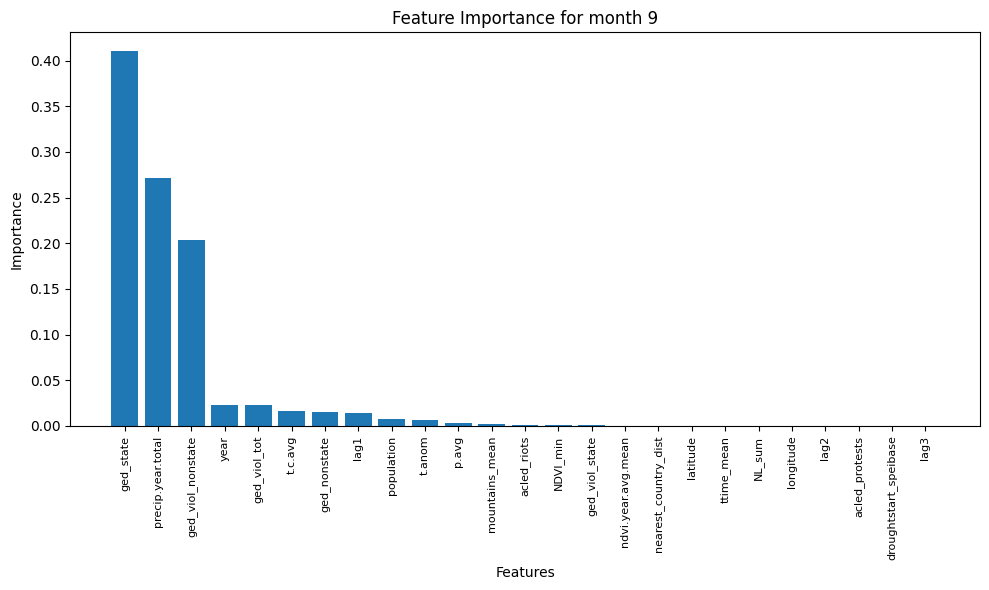

Month: 10
Mean Squared Error: 0.2714080091420012
R-squared: 0.999952175437298


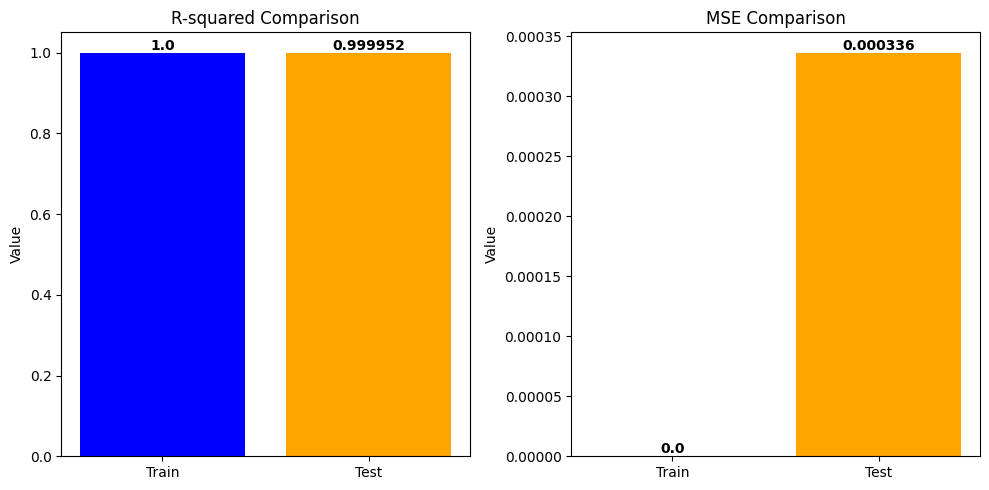

Feature Importance for month 10:
lag1 : 0.35942325
ged_state : 0.2665101
t.c.avg : 0.23874754
ndvi.year.avg.mean : 0.06133467
ged_viol_tot : 0.042815108
year : 0.010506537
NDVI_min : 0.0041370774
t.anom : 0.0037128148
ged_viol_nonstate : 0.0036735183
nearest_country_dist : 0.0026936017
population : 0.0024689776
ged_viol_state : 0.0019318585
precip.year.total : 0.00082676875
NL_sum : 0.0004587993
ged_nonstate : 0.00022139933
p.avg : 0.00019581114
acled_protests : 0.00018362625
longitude : 6.2929634e-05
ttime_mean : 5.9120892e-05
latitude : 1.4600474e-05
lag2 : 9.390488e-06
droughtstart_speibase : 6.627961e-06
mountains_mean : 3.0214326e-06
lag3 : 1.4868525e-06
acled_riots : 1.4102133e-06
pitf_nonstate_inc : 6.407332e-10
month : 0.0
pitf_state_inc : 0.0
pitf_state_camp : 0.0
pitf_nonstate_sanc_inc : 0.0
pitf_nonstate_sanc_camp : 0.0
pitf_nonstate_camp : 0.0
pitf_multiple_inc : 0.0
pitf_multiple_camp : 0.0
pitf_trans_inc : 0.0
pitf_trans_camp : 0.0
desert.year : 0.0
desert.month_mean : 0.

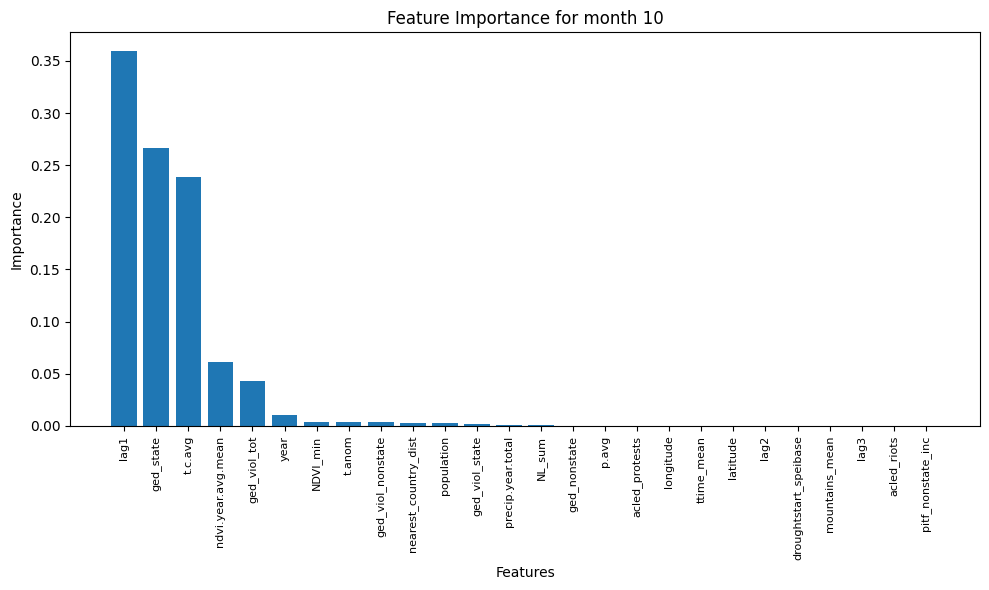

Month: 11
Mean Squared Error: 0.2714080091420012
R-squared: 0.9998632645862806


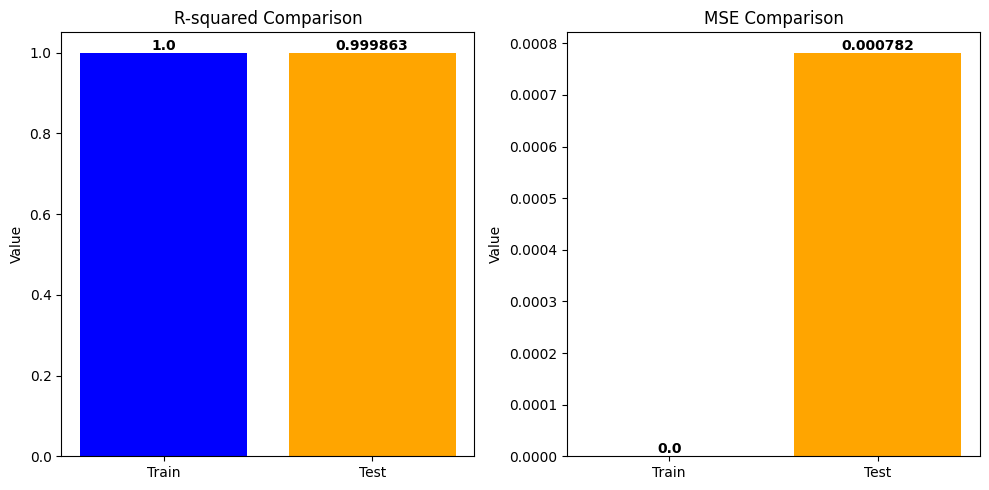

Feature Importance for month 11:
ged_state : 0.35968778
year : 0.13301264
ged_viol_tot : 0.09882558
ged_viol_nonstate : 0.09221464
t.anom : 0.08669588
longitude : 0.081157744
latitude : 0.06613345
nearest_country_dist : 0.025187638
p.avg : 0.022251546
lag1 : 0.012562942
precip.year.total : 0.008735854
mountains_mean : 0.004591364
ndvi.year.avg.mean : 0.0037818623
population : 0.0023944275
t.c.avg : 0.0010772839
ged_nonstate : 0.0005490088
ttime_mean : 0.00032265534
acled_riots : 0.00027411222
NL_sum : 0.00018252454
NDVI_min : 0.0001622129
lag2 : 0.00012039855
lag3 : 3.6517307e-05
ged_viol_state : 3.3518496e-05
droughtstart_speibase : 8.399583e-06
month : 0.0
acled_protests : 0.0
pitf_state_inc : 0.0
pitf_state_camp : 0.0
pitf_nonstate_sanc_inc : 0.0
pitf_nonstate_sanc_camp : 0.0
pitf_nonstate_inc : 0.0
pitf_nonstate_camp : 0.0
pitf_multiple_inc : 0.0
pitf_multiple_camp : 0.0
pitf_trans_inc : 0.0
pitf_trans_camp : 0.0
desert.year : 0.0
desert.month_mean : 0.0
desert.count_mean : 0.0
par

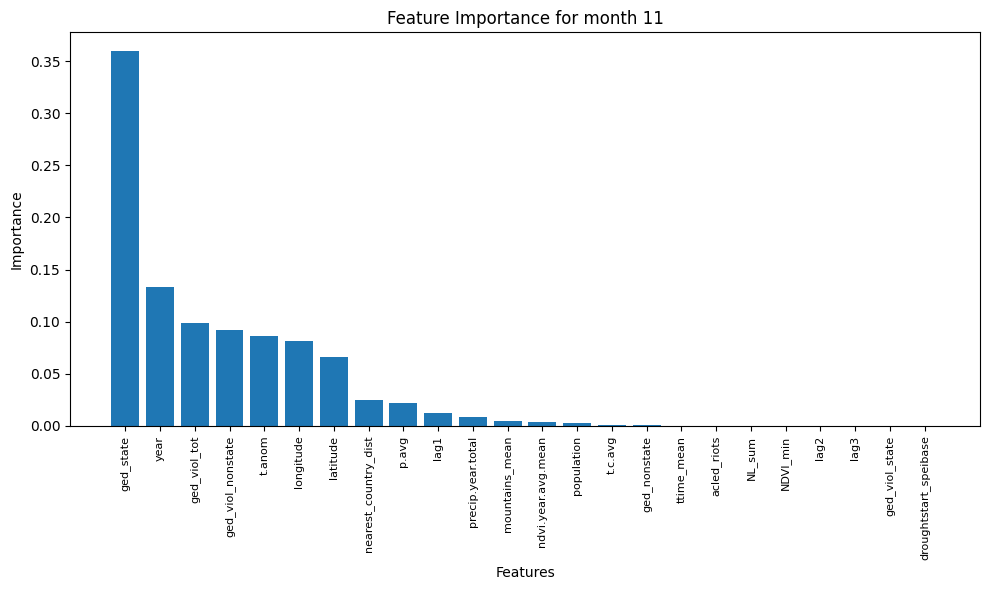

Month: 12
Mean Squared Error: 0.2714080091420012
R-squared: 0.9995475646433508


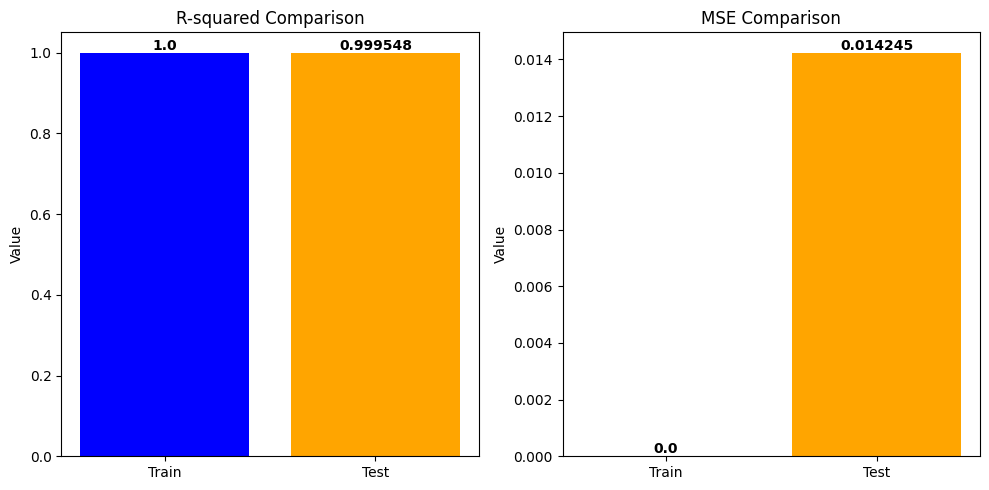

Feature Importance for month 12:
ged_nonstate : 0.9848338
ged_viol_tot : 0.0050294246
population : 0.003616661
ged_state : 0.0029070824
pitf_nonstate_inc : 0.0017134587
ged_viol_nonstate : 0.0011413207
year : 0.00022295798
lag1 : 0.00016384349
NL_sum : 0.0001114495
NDVI_min : 7.842368e-05
precip.year.total : 5.531238e-05
p.avg : 3.9176994e-05
ttime_mean : 3.1893243e-05
ndvi.year.avg.mean : 1.5039044e-05
ged_viol_state : 8.869695e-06
t.anom : 8.267777e-06
t.c.avg : 7.5356643e-06
mountains_mean : 7.319913e-06
nearest_country_dist : 5.4455118e-06
droughtstart_speibase : 1.1438606e-06
latitude : 7.6721983e-07
longitude : 7.562468e-07
lag2 : 8.203655e-08
lag3 : 1.8768812e-08
acled_protests : 1.5901261e-09
month : 0.0
acled_riots : 0.0
pitf_state_inc : 0.0
pitf_state_camp : 0.0
pitf_nonstate_sanc_inc : 0.0
pitf_nonstate_sanc_camp : 0.0
pitf_nonstate_camp : 0.0
pitf_multiple_inc : 0.0
pitf_multiple_camp : 0.0
pitf_trans_inc : 0.0
pitf_trans_camp : 0.0
desert.year : 0.0
desert.month_mean : 0.0

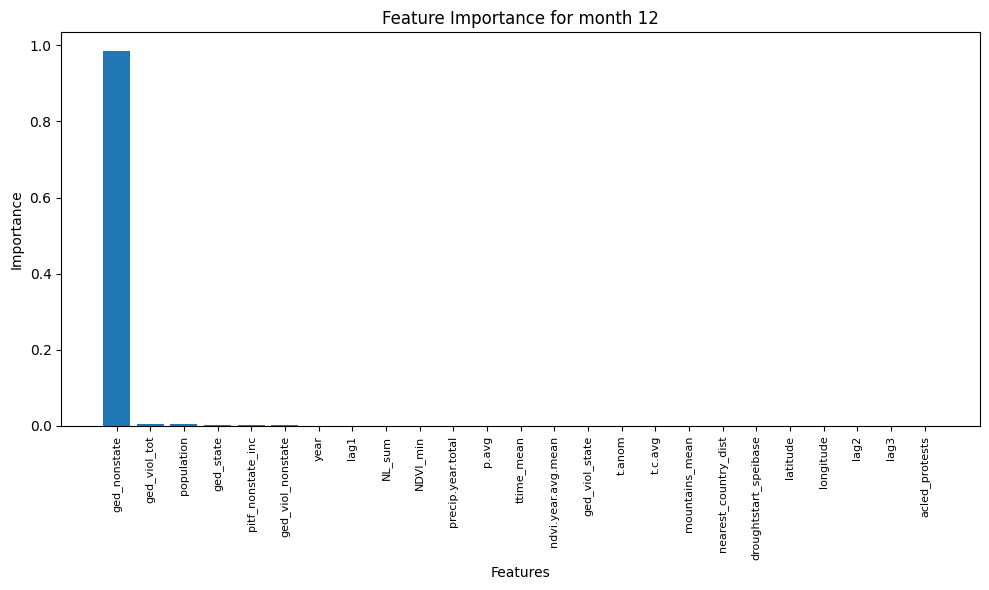

In [25]:
#We adjust the process for each of the 12 months present in the dataset

scaler = StandardScaler()
boosted = XGBRegressor(objective='reg:squarederror')
steps = [("transformer", data_preparation(X)), ("scaler", scaler), ("model", boosted)]
pipe = Pipeline(steps)

for month in df['month'].unique():

    df_month = df[df['month'] == month]
    X = df_month.drop('target', axis=1) 
    y = df_month['target']

    # We split the data (replace with your own splitting method)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    mse_boosted_1 = mean_squared_error(y_test, y_pred)
    r2_boosted_1 = r2_score(y_test, y_pred)

    print(f"Month: {month}")
    print("Mean Squared Error:", mse_boosted)
    print("R-squared:", r2_boosted_1)

    y_train_pred = pipe.predict(X_train)

    # We calculate the metrics for both train and test sets
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_pred)

    # We create bar plots for R-squared and MSE side by side
    #R-squared
    metrics = ['Train', 'Test']
    train_values = [r2_train, mse_train]
    test_values = [r2_test, mse_test]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.bar(metrics, [train_values[0], test_values[0]], color=['blue', 'orange'])
    ax1.set_ylabel('Value')
    ax1.set_title('R-squared Comparison')
    for i, v in enumerate([train_values[0], test_values[0]]):
        ax1.text(i, v, str(round(v, 6)), ha='center', va='bottom', fontweight='bold')

    # MSE
    ax2.bar(metrics, [train_values[1], test_values[1]], color=['blue', 'orange'])
    ax2.set_ylabel('Value')
    ax2.set_title('MSE Comparison')
    for i, v in enumerate([train_values[1], test_values[1]]):
        ax2.text(i, v, str(round(v, 6)), ha='center', va='bottom', fontweight='bold')

    # Adjusting spacing between subplots...
    plt.tight_layout()
    plt.show()
    plt.show()

    # And feature importance display and plots
    importance = pipe.named_steps['model'].feature_importances_
    feature_importance_dict = dict(zip(X.columns, importance))
    sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
    print(f"Feature Importance for month {month}:")
    for feature, importance in sorted_feature_importance:
        print(feature, ":", importance)

    # We filter out variables with importance equal to 0
    filtered_feature_importance = [(feature, importance) for feature, importance in sorted_feature_importance if importance != 0]
    features = [item[0] for item in filtered_feature_importance]
    importances = [item[1] for item in filtered_feature_importance]

    # We plot
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    plt.bar(range(len(features)), importances)
    plt.xticks(range(len(features)), features, rotation=90, fontsize=8)  # Smaller x-labels with fontsize=8
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title(f'Feature Importance for month {month}')
    plt.tight_layout()  # Adjust the spacing of the plot elements
    plt.show()

## Third model: Deep Neural Network

Finally, we tried a Keras-built Sequential Neural Network, using three hidden layers of 64, 64 and 32 neurons (respectively), with a rectified linear unit as activation function. 

As we did, we checked for overfitting, and checked also for feature importance following the structure done in the other two models. In this case,  we have to one-hot encode all variables of type object beforehand, as keras does not allow for a full-fledged ```Pipeline```! Nonetheless, as we do not have objects anymore, we can proceed with the variables as they are!

In [26]:
df.dtypes.value_counts()

float64    34
int64      11
dtype: int64

In [27]:
#We create a variable to help us with the input shape: this will allow for automation depending on varying
#feature importances in the first block of the notebook cascading down. We basically display the columns after
#the previous transformation.

input_shape_help=df.shape[1]
input_shape_help

45

In [28]:
#train-test split

X=df.drop("target", axis=1)
y=df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [29]:
# We then import all subsequent Keras modules we will need

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import History
from keras.utils import to_categorical
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError
import tensorflow.keras.backend as K

In [30]:
# And create a function that returns the Keras model, with all parameters mentioned before inside.

def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - SS_res/(SS_tot + K.epsilon())

def create_model(neurons1=64, neurons2=64, neurons3=32):
    model = Sequential()
    model.add(Dense(neurons1, input_shape=(input_shape_help-1,), activation='relu')) 
    model.add(Dense(neurons2, activation='relu'))
    model.add(Dense(neurons3, activation="relu"))
    model.add(Dense(1))  # Output layer with a single neuron for numerical target
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=[MeanSquaredError(), MeanAbsoluteError(), r_squared])
    model.summary()
    return model

In [31]:
# We create the pipeline with the Keras model embedded

pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler(with_mean=False)),
    ('keras', KerasRegressor(build_fn=create_model, epochs=100, batch_size=64, verbose=0))
])

# We fit the pipeline with the training data
pipe.fit(X_train, y_train)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2880      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,153
Trainable params: 9,153
Non-trainable params: 0
_________________________________________________________________


Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('scaler', StandardScaler(with_mean=False)),
                ('keras',
                 <keras.wrappers.scikit_learn.KerasRegressor object at 0x7fdc2fc8f6a0>)])

In [32]:
# We predict and display metrics
y_pred = pipe.predict(X_test)

mse_neural = mean_squared_error(y_test, y_pred)
r_squared_neural = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse_neural)
print("R-squared (R^2):", r_squared_neural)

Mean Squared Error (MSE): 1.130261767122719
R-squared (R^2): 0.9292740754089674


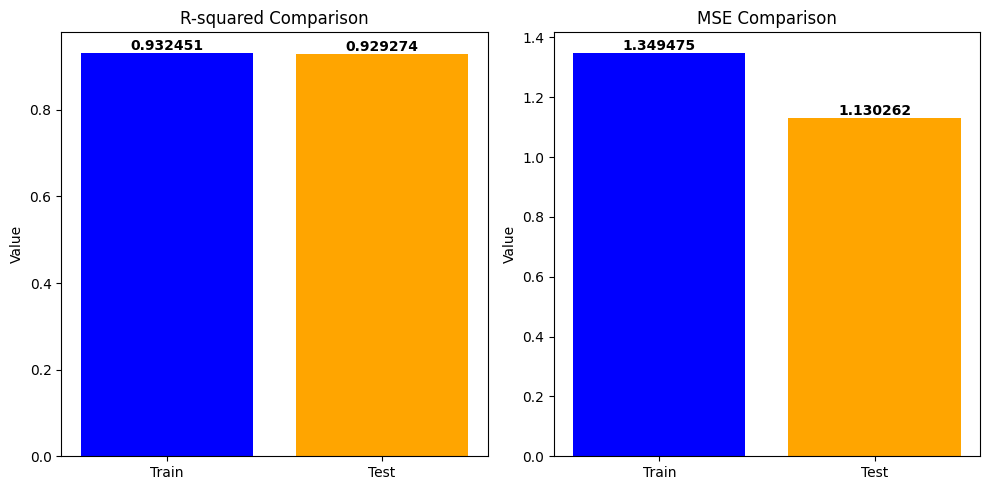

In [33]:
# We calculate metrics for both train and ttest
mse_neural = mean_squared_error(y_test, y_pred)
r_squared_neural = r2_score(y_test, y_pred)
y_train_pred = pipe.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_pred)

# We create bar plots for R-squared and MSE
#R-squared
metrics = ['Train', 'Test']  # Updated labels for columns
train_values = [r2_train, mse_train]
test_values = [r2_test, mse_test]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.bar(metrics, [train_values[0], test_values[0]], color=['blue', 'orange'])
ax1.set_ylabel('Value')
ax1.set_title('R-squared Comparison')
for i, v in enumerate([train_values[0], test_values[0]]):
    ax1.text(i, v, str(round(v, 6)), ha='center', va='bottom', fontweight='bold')

# MSE
ax2.bar(metrics, [train_values[1], test_values[1]], color=['blue', 'orange'])
ax2.set_ylabel('Value')
ax2.set_title('MSE Comparison')
for i, v in enumerate([train_values[1], test_values[1]]):
    ax2.text(i, v, str(round(v, 6)), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

Ordered Feature Importance:
lag1 : 106.537415
NL_sum : 59.52655
latitude : 56.292534
t.anom : 51.079506
mountains_mean : 46.811684
month : 44.210854
ged_state : 42.81986
NDVI_min : 42.567986
lag3 : 41.76094
ged_viol_tot : 39.600952
own_borders_dist : 39.47873
nearest_country_dist : 38.980076
lag2 : 35.056217
p.avg : 31.178635
ged_nonstate : 30.64202
ged_viol_nonstate : 30.460522
desert.count_mean : 29.52874
pitf_nonstate_inc : 29.00931
ged_viol_state : 26.808226
population : 26.683712
droughtstart_speibase : 25.20865
ttime_mean : 24.233004
acled_riots : 23.994175
ndvi.year.avg.mean : 22.996744
acled_protests : 21.84431
precip.year.total : 20.754187
pitf_state_inc : 19.226252
t.c.avg : 17.480297
hdi_index : 16.020426
longitude : 15.257837
pitf_multiple_camp : 13.792448
goldsurface_s : 13.601119
pitf_multiple_inc : 13.430883
diamprim_s : 13.009411
year : 10.686731
pitf_nonstate_camp : 9.319288
pitf_trans_camp : 8.021665
desert.month_mean : 7.9866915
desert.year : 7.8482795
pitf_trans_inc

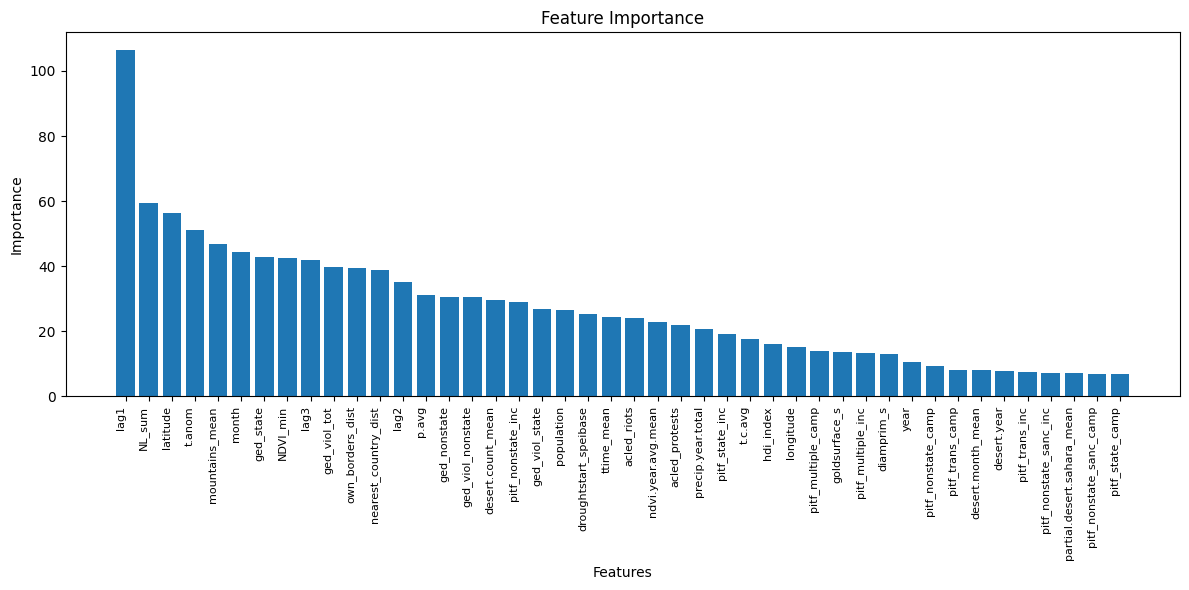

In [34]:
# We get the trained Keras model from the pipeline
keras_model = pipe.named_steps['keras'].model

# Then the weights of the first layer
weights_layer1 = keras_model.layers[0].get_weights()[0]

# We calculate the absolute sum of weights for each feature
feature_importances = np.abs(weights_layer1).sum(axis=1)

# We create a list of tuples containing feature name and importance
feature_importance_list = [(feature, importance) for feature, importance in zip(X_train.columns, feature_importances)]

# We sort the feature importance list in descending order
sorted_feature_importance = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)

# We filter out variables with importance equal to 0
filtered_feature_importance = [(feature, importance) for feature, importance in sorted_feature_importance if importance != 0]

# We print the ordered list
print("Ordered Feature Importance:")
for feature, importance in filtered_feature_importance:
    print(feature, ":", importance)

# And plot it
features = [item[0] for item in filtered_feature_importance]
importances = [item[1] for item in filtered_feature_importance]
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.bar(range(len(features)), importances)
plt.xticks(range(len(features)), features, rotation=90, ha='right', fontsize=8)  # Rotate x-labels and adjust alignment
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()  # Adjust the spacing of the plot elements
plt.show()

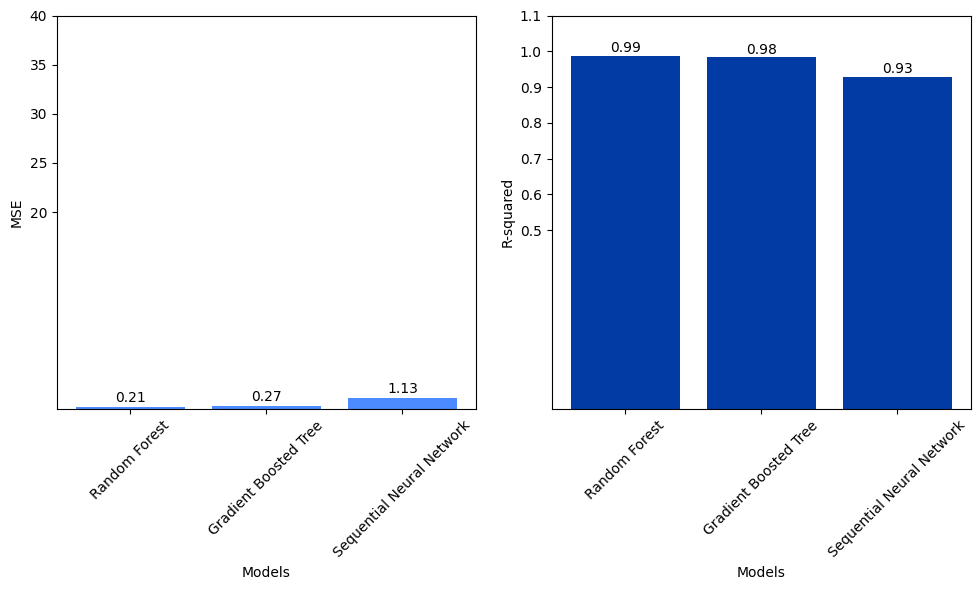

In [35]:
# We create a comprehensive Graph of MSE and R2

# We define the variables
models = ["Random Forest", "Gradient Boosted Tree", "Sequential Neural Network"]
mse_values = [mse_forest, mse_boosted, mse_neural]
r_squared_values = [r2_forest, r2_boosted, r_squared_neural]

#And plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # MSE subplot
plt.bar(models, mse_values, color='#4B8BFF')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.yticks(np.arange(20, 41, 5))
for i, mse in enumerate(mse_values):
    plt.text(i, mse + 0.5, f'{mse:.2f}', fontsize=10, ha='center')

# We then plot the R-squared values
plt.subplot(1, 2, 2)  # R-squared subplot
plt.bar(models, r_squared_values, color='#013BA3')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.xticks(rotation=45)
plt.yticks(np.arange(0.5, 1.1, 0.1))
for i, r_squared in enumerate(r_squared_values):
    plt.text(i, r_squared + 0.01, f'{r_squared:.2f}', fontsize=10, ha='center')

# We adjust the spacing between subplots and the layouts
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()